##Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)



----------------------------------------------------------------------------------------------



PCA Implementation

Checking with other Clustering Algorithms

Hierarchical Clustering

K-Means Clustering

Build Cluster algorithm using K=3

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
#Load the data set
wine = pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###Data Understanding

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.Type.unique()

array([1, 2, 3])

In [7]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [8]:
wine['ID'] = range(1, 179, 1)
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [9]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [10]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [11]:
wine.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

###1)Exploratory Data Analysis

Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature.


This method can bring fast insights as:

Check the kind of each feature distribution

Check data symmetry

Verify features frequency

Identify outliers

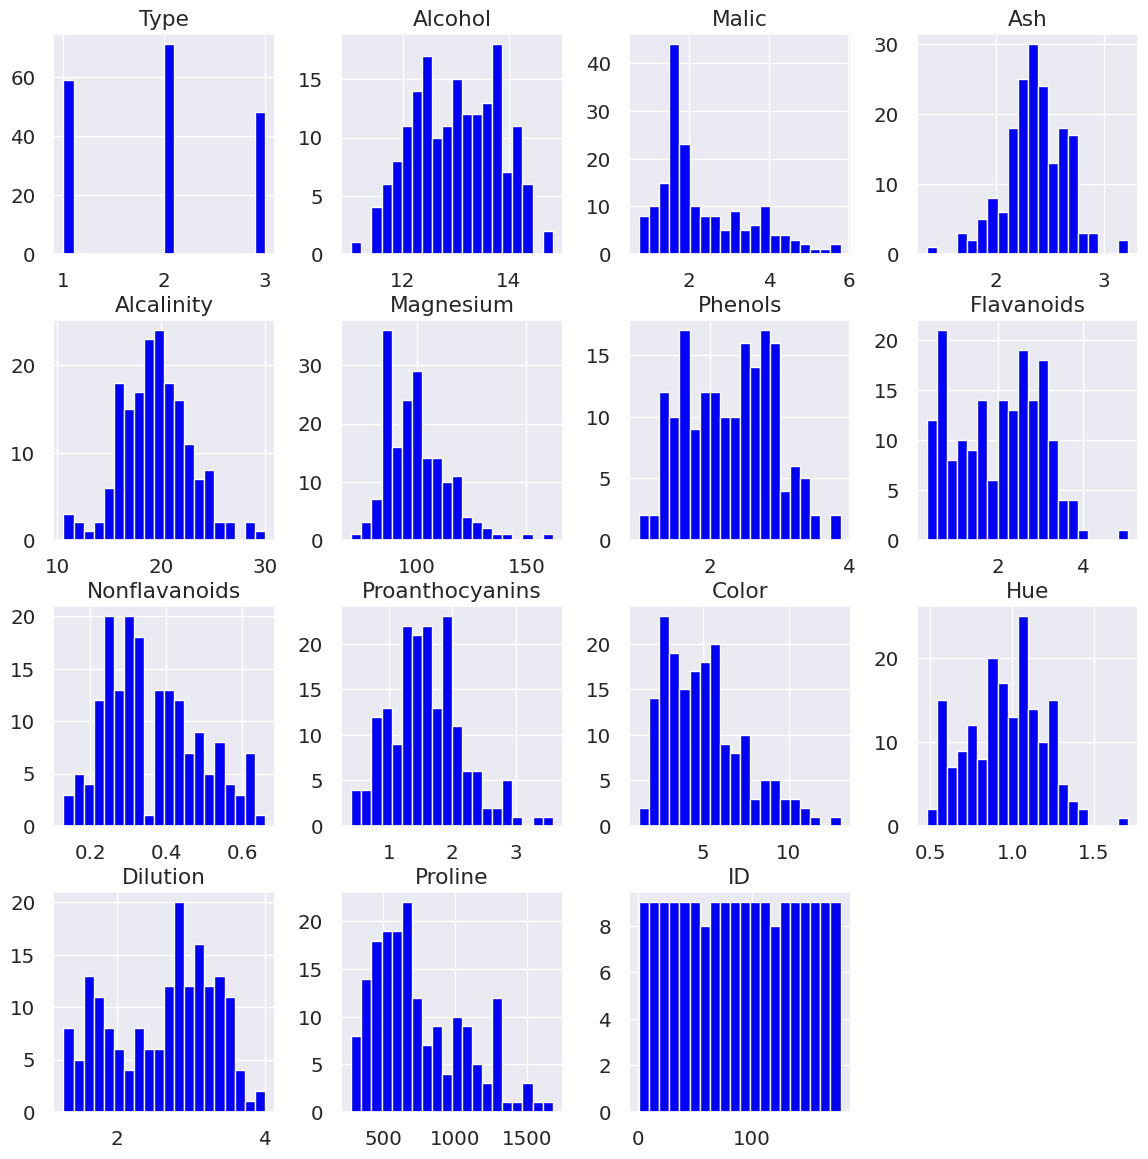

In [12]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = wine.hist(bins= 20, color= 'blue')

1.1 Outliers Detection

In [13]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

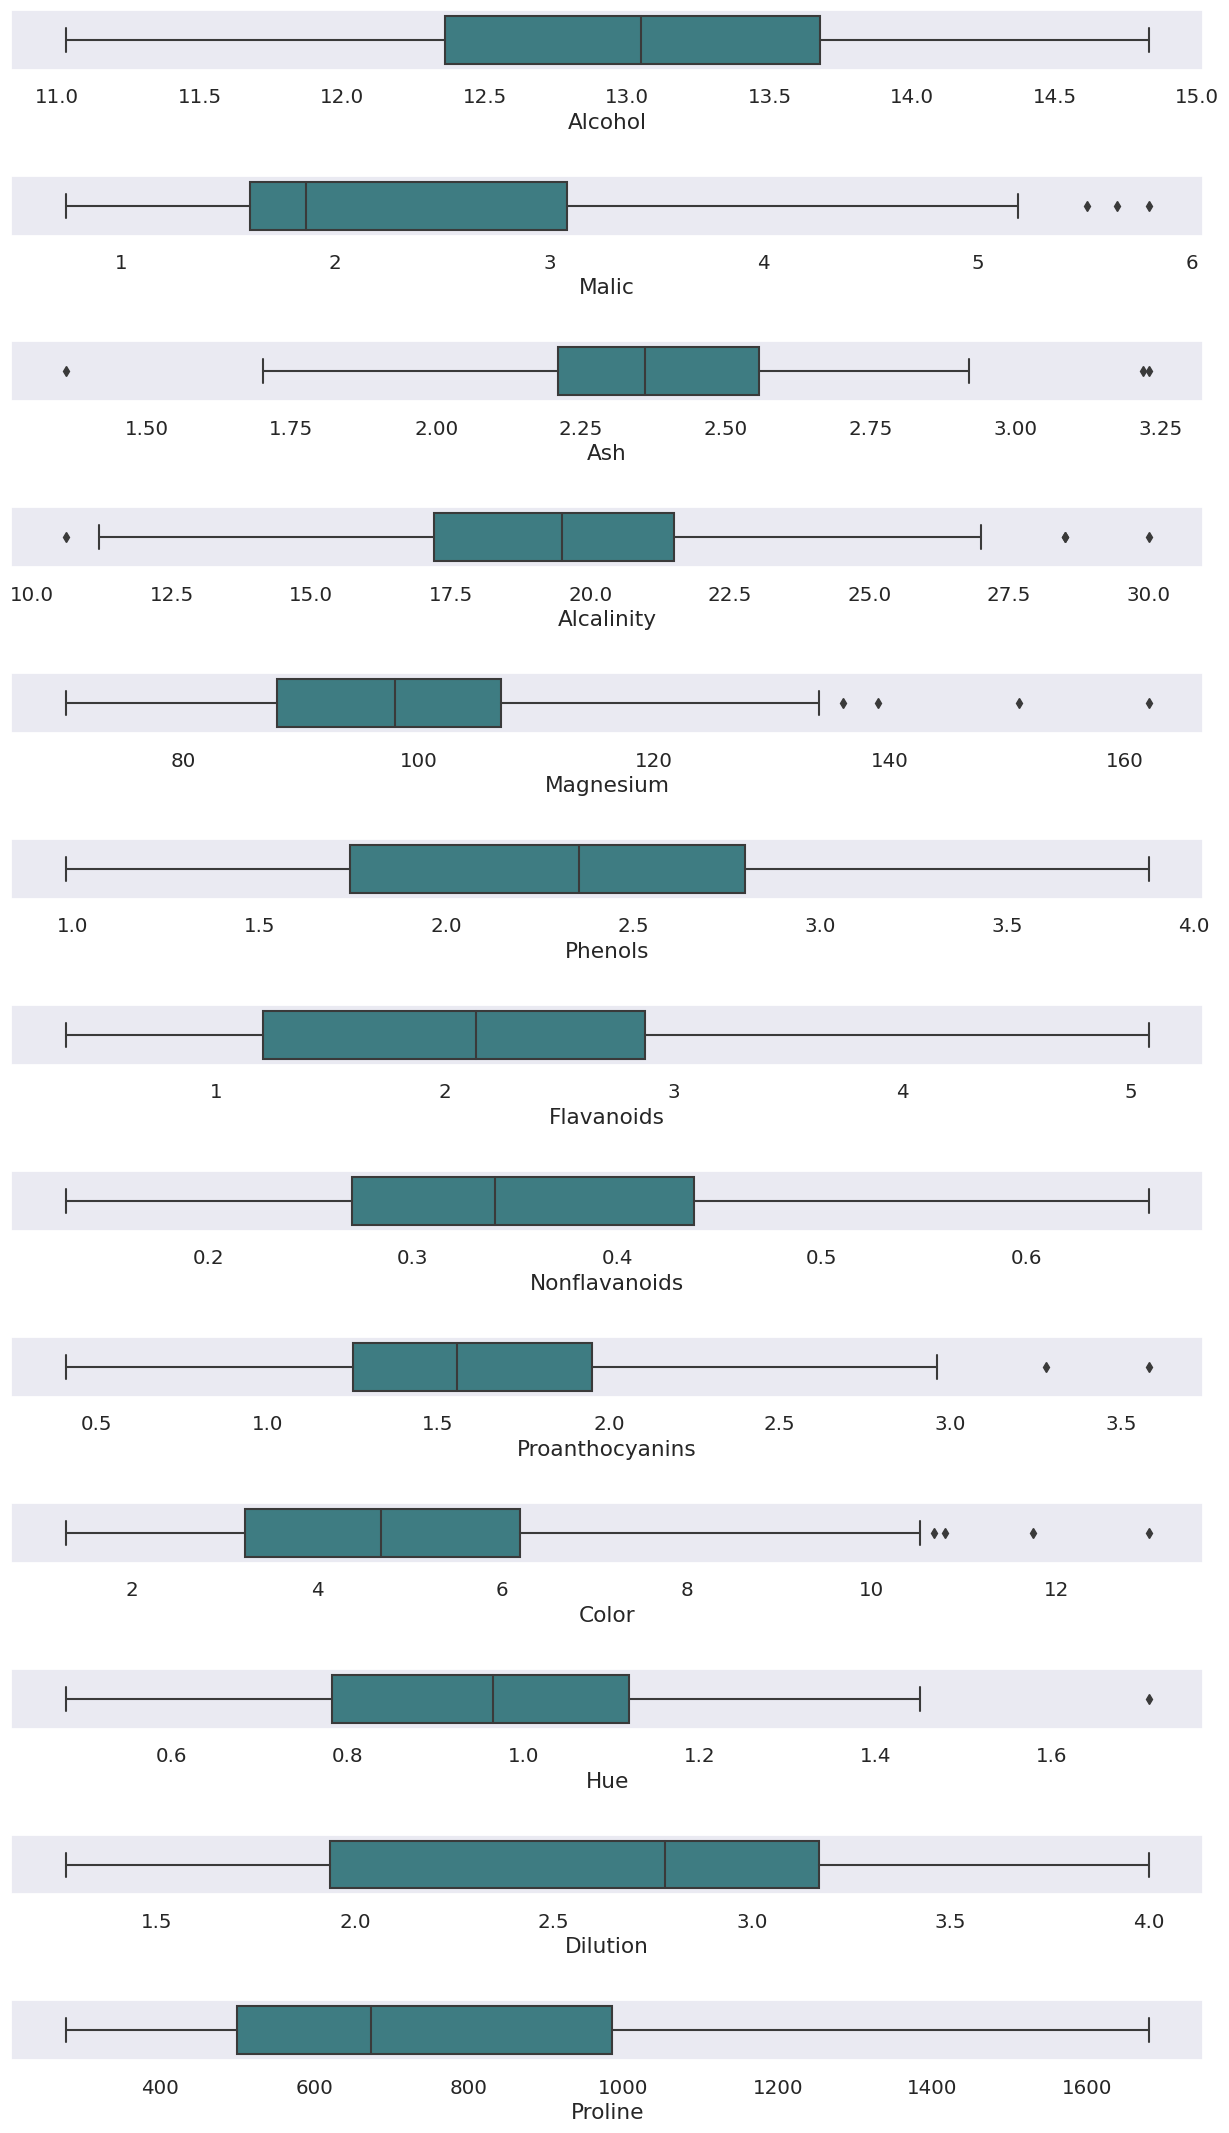

In [14]:
outlier = wine.copy()
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

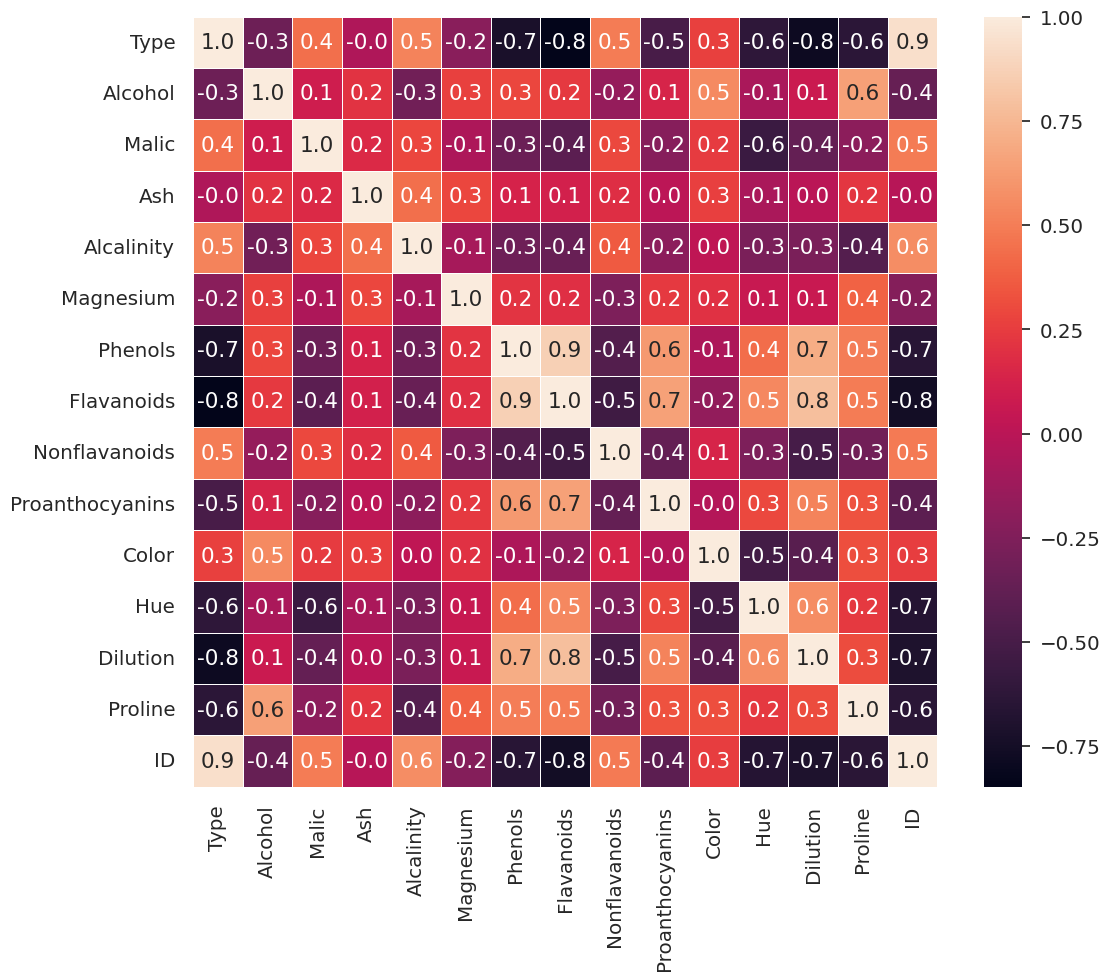

In [15]:
#Correlation Heatmap

f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(wine.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

from the above correlation heatmap we can conclude that :

Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins

Flavanoids is positively correlated with Proanthocyanins and Dilution

Dilution is positively correlated with Hue

Alcohol is positively correlated with Proline

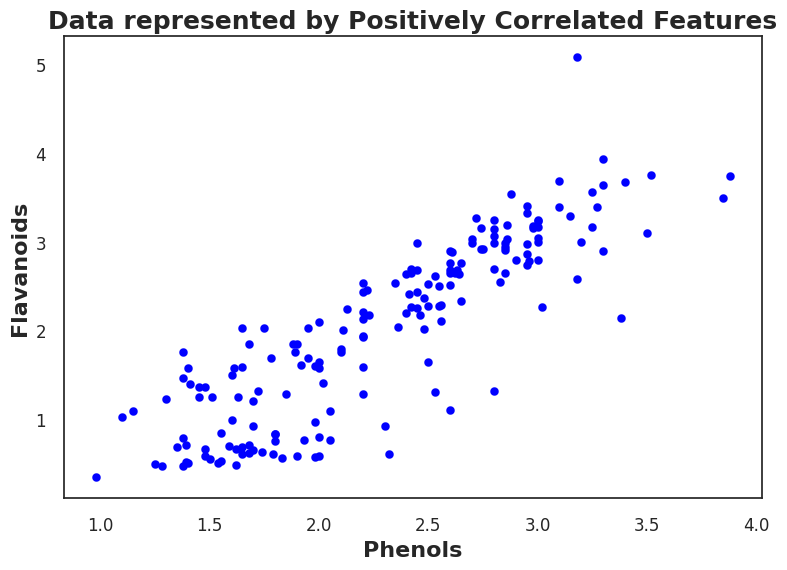

In [16]:
#Plotting frequent flying Phenols vs. Flavanoids

sns.set(style='white', rc= {'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x= wine['Phenols'], y= wine['Flavanoids'], color='blue', lw=0.1)
plt.xlabel('Phenols',fontweight='bold', fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold', fontsize=16)
plt.title('Data represented by Positively Correlated Features',fontweight='bold',fontsize= 18)
plt.show()

###2)Data Preprocessing

In [17]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [18]:
wine_df = wine.set_index('ID')
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
#2.1) Applying Standard Scaler on the Data

standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(wine)
std_wine.shape

(178, 15)

In [20]:
#2.2) Applying MinMax Scaler on Dataset


minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(wine)
norm_wine.shape

(178, 15)

###3)PCA (Principal Component Analysis)

In [21]:
#3.1 PCA on Standard Scaled Dataset

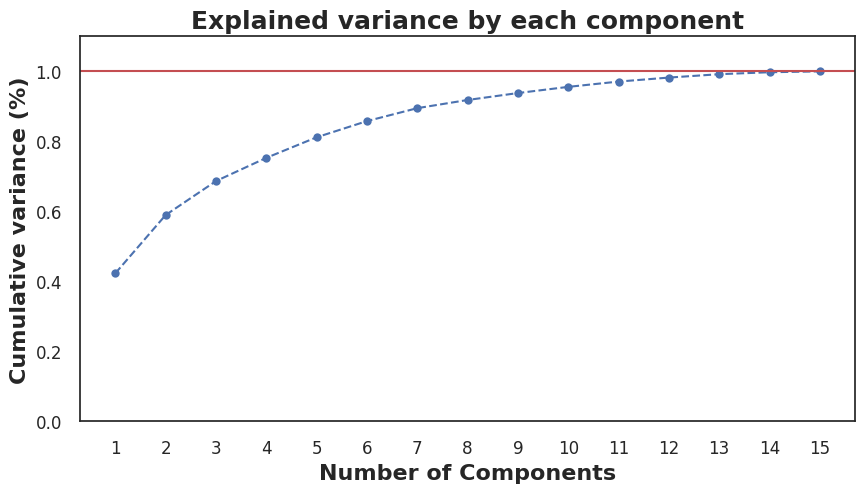

In [22]:
pca_var = PCA()
pca_var.fit(std_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + std_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1+std_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [23]:
#The amount of variance that each PCA explains is :

var = pca_var.explained_variance_ratio_
var

array([0.42315618, 0.16647321, 0.09699353, 0.06632946, 0.05877432,
       0.04624981, 0.03695786, 0.0233517 , 0.01982763, 0.01765908,
       0.0151364 , 0.01143312, 0.00964268, 0.00560632, 0.0024087 ])

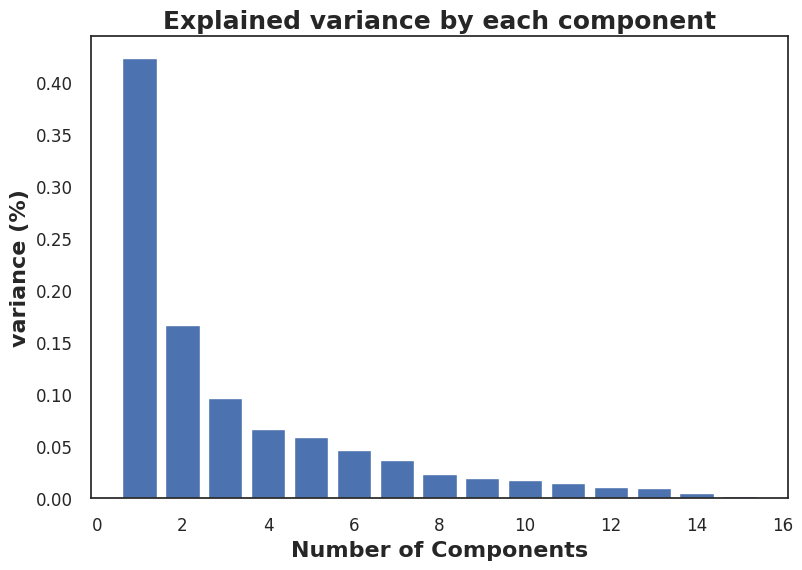

In [24]:
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Number of Components', fontweight='bold', fontsize=16)
plt.ylabel('variance (%)', fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

In [25]:
#Cumulative Variance

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 42.32,  58.97,  68.67,  75.3 ,  81.18,  85.8 ,  89.5 ,  91.84,
        93.82,  95.59,  97.1 ,  98.24,  99.2 ,  99.76, 100.  ])

In [26]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,3.906276,-1.454982,-0.155368
1,3.005931,0.330906,-2.079463
2,3.187606,-1.038081,0.978714
3,4.245701,-2.771261,-0.126183
4,1.904549,-0.866149,1.917434


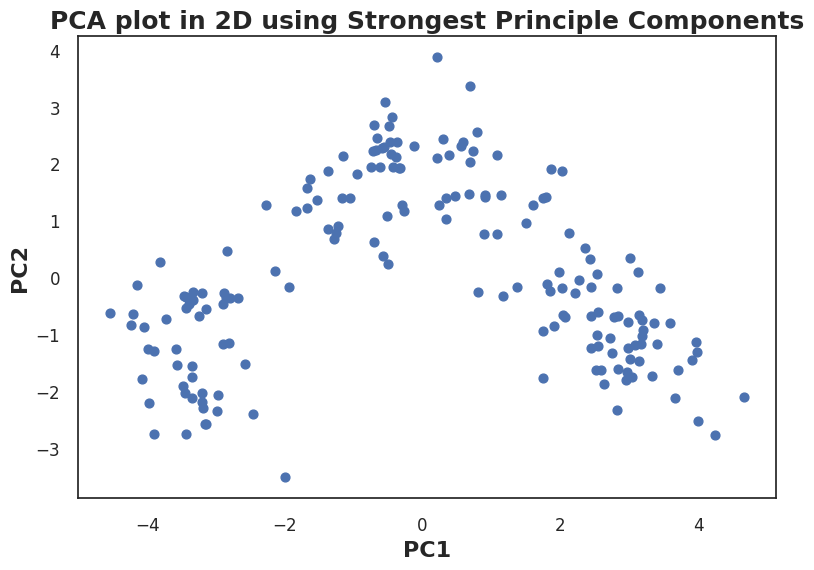

In [27]:
#PCA plot in 2D

plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

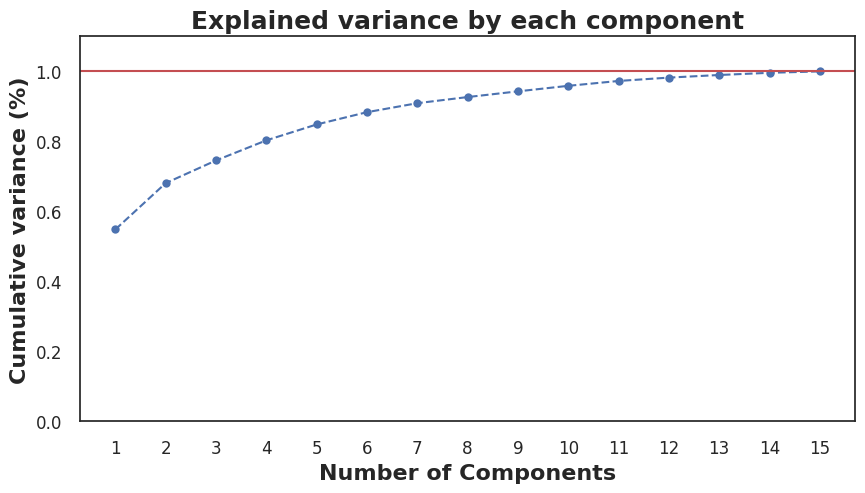

In [28]:
#3.2 PCA on MinMax Scaled Dataset

pca_var = PCA()
pca_var.fit(norm_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + norm_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1 + norm_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [29]:
#amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.54830941, 0.13241097, 0.06480939, 0.0574237 , 0.04538901,
       0.0350859 , 0.02569862, 0.01752812, 0.01631456, 0.01577557,
       0.01391124, 0.00958205, 0.00746694, 0.00626671, 0.00402782])

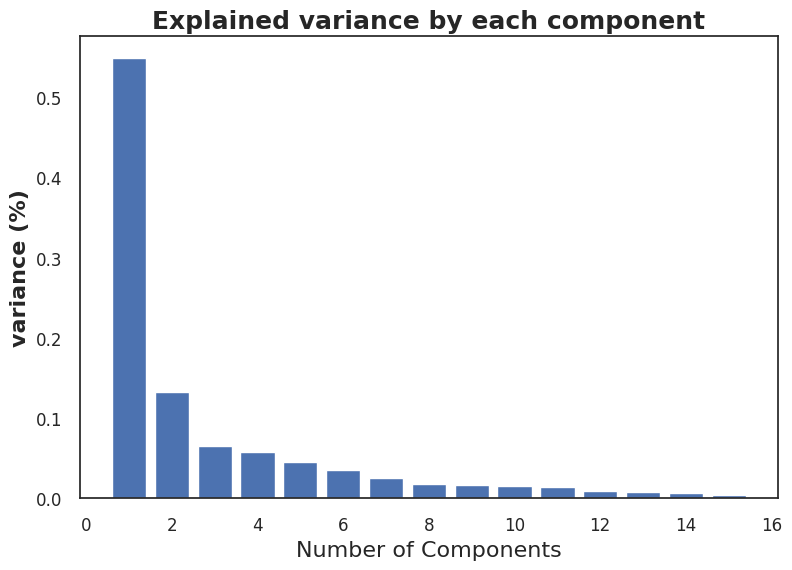

In [30]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

In [31]:
#Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 54.83,  68.07,  74.55,  80.29,  84.83,  88.34,  90.91,  92.66,
        94.29,  95.87,  97.26,  98.22,  98.97,  99.6 , 100.  ])

In [32]:
pca = PCA(n_components=3)
pca_norm = pca.fit_transform(norm_wine)

# Convert to data frame
pca_norm_wine = pd.DataFrame(data = pca_norm, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


In [33]:
#The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space

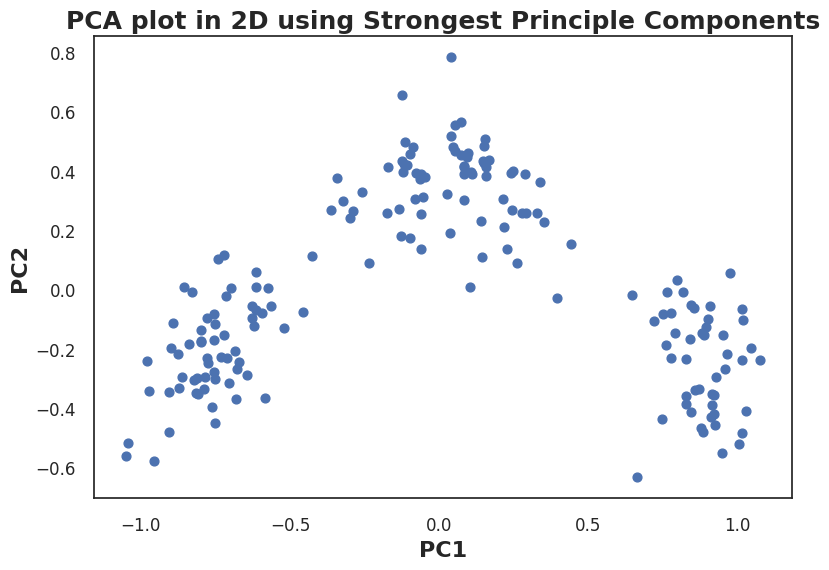

In [34]:
#PCA plot in 2D


plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

Notice how these points have no colours (yet) because we don't know what their classes are. This is what makes it an unsupervised method.
We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into 3 groups using techniques such as k-Means and Hierarchical

###4) KMeans Clustering

In [35]:
#4.1 Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [36]:
!pip install tqdm

In [37]:
!pip3 install tqdm

In [38]:
#subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'tdqm'])
from tqdm import tqdm

In [39]:
!pip3 install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12523 sha256=540523308331def662305537c57a0c8e328f38af8edbdcb6adcbf3ed540eb7a1
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [40]:
pip install scikit-learn==0.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.22-cp310-cp310-linux_x86_64.whl size=20724293 sha256=17be4fa1088fea01888dac9178351fe172cca79a3954563198e50bcbf00a884b
  Stored in directory: /root/.cache/pip/wheels/a8/a8/42/cf60e8eea7068ab704ddfbca37e6b1e1d15c436616ca61a530
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.22 which is incompatible.
mlxtend 0.22.0 requires scikit-learn>=1.0.2, but you have scikit-learn 0.22 which is incompatible.
sklearn

In [41]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

  0%|          | 0/8 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f9969f92320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0: cannot open shared object file: No such file or directory
100%|█████

In [42]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i] = sil(pca_std_wine, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 12.69it/s]


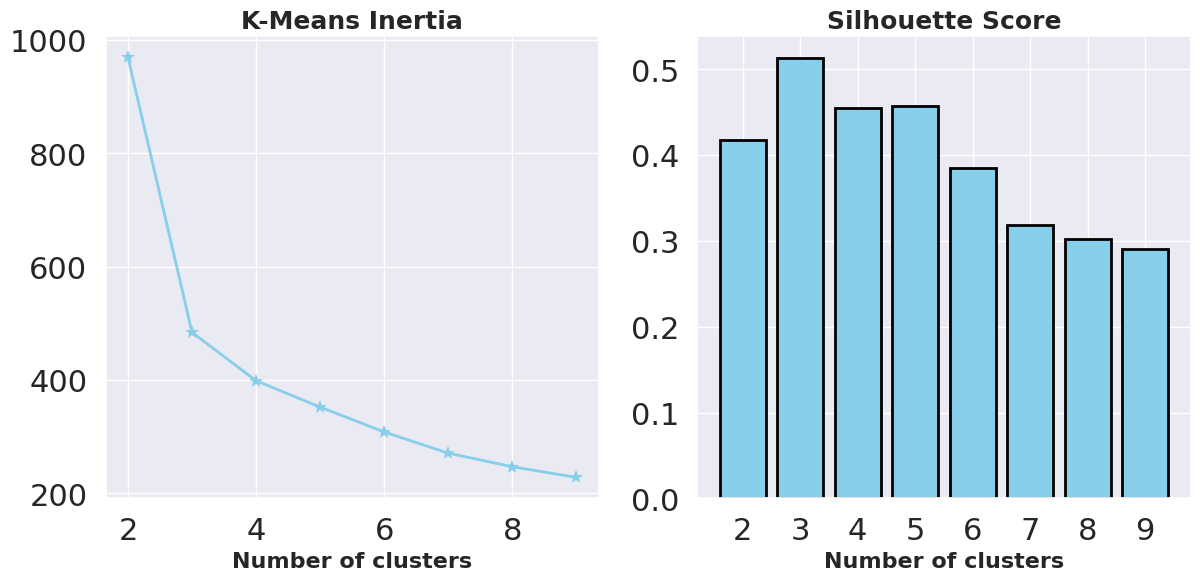

In [43]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

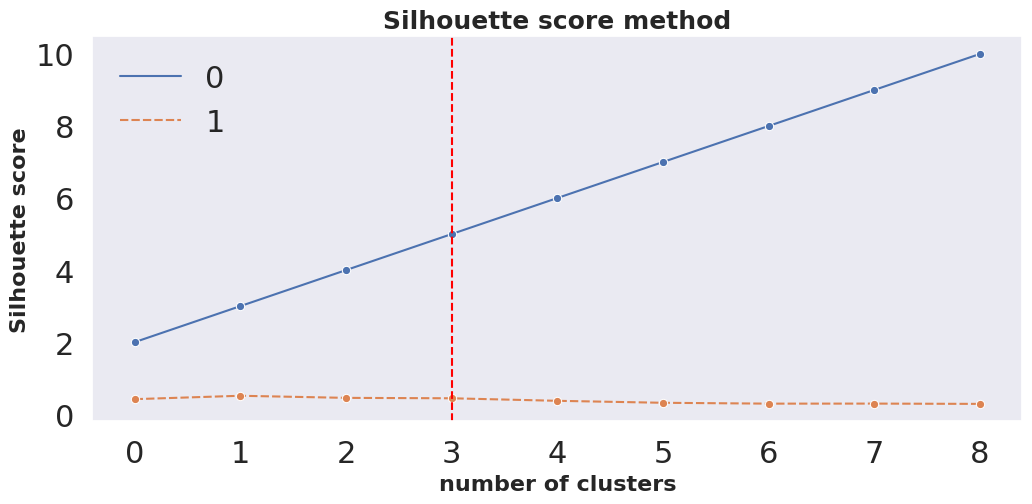

In [45]:
#4.2 Silhouette Score

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data = (n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method",fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()


Silhouette score method indicates the best options would be respectively 3 clusters.
Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation) knee Elbow graph method
Instantiate a scikit-learn K-Means model.

 we will check for two diff hyperparameters value effect.


Elbow Plot for Standard Scaler data


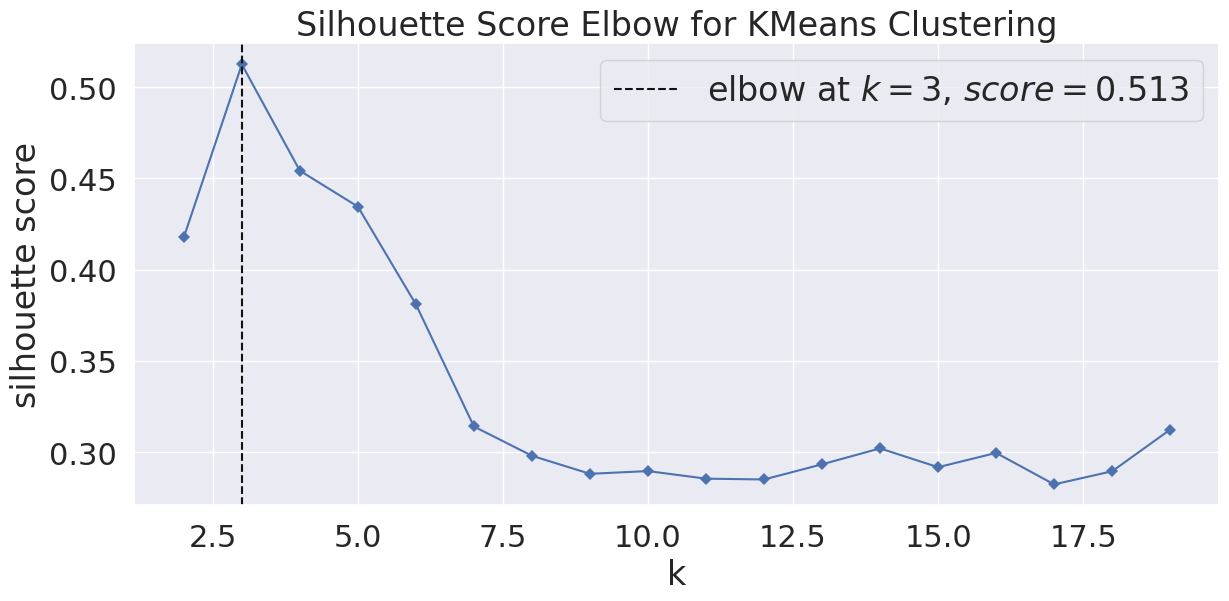

In [46]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_wine)
visualizer.show()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.

We will also use the Silhouette score to determine an optimal number.

In [47]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4188459981249866
For n_clusters = 3 The average silhouette_score is : 0.5125042495290014
For n_clusters = 4 The average silhouette_score is : 0.453717490893092
For n_clusters = 5 The average silhouette_score is : 0.39446972773121486
For n_clusters = 6 The average silhouette_score is : 0.31397404712644644
For n_clusters = 7 The average silhouette_score is : 0.3098601766699668
For n_clusters = 8 The average silhouette_score is : 0.29593791599249625
For n_clusters = 9 The average silhouette_score is : 0.2911664096029887


According the the silhouette score of:

The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.51

In [48]:
#4.3 Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset
#We have found good number of cluster = 3
#Model building using cluster numbers = 3


model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

(178,)

In [49]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [50]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [51]:
model_kmeans.cluster_centers_

array([[-3.30102796, -1.20591448, -0.19696529],
       [-0.14108709,  1.72051631,  0.21637408],
       [ 2.80892282, -0.94926721, -0.08298588]])

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [52]:
model_kmeans.inertia_

483.6727156564367

In [53]:
#Assign clusters to the data set

wine_df['Kmeans_Label'] = model_kmeans.labels_

In [54]:
#Group data by Clusters (K=6)


wine_df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


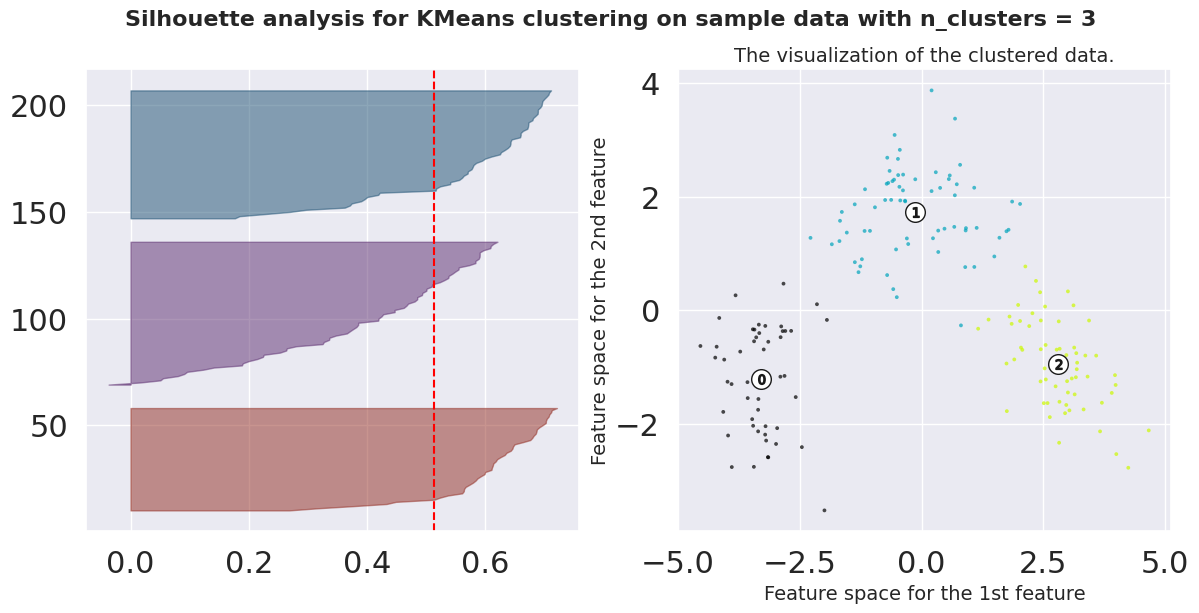

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
ax2.scatter(pca_std_wine.iloc[:, 0], pca_std_wine.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),fontsize=16, fontweight='bold')

plt.show()


In [56]:
#4.4 Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data


inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


In [58]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    silhouette[i] = sil(pca_norm_wine, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 14.71it/s]


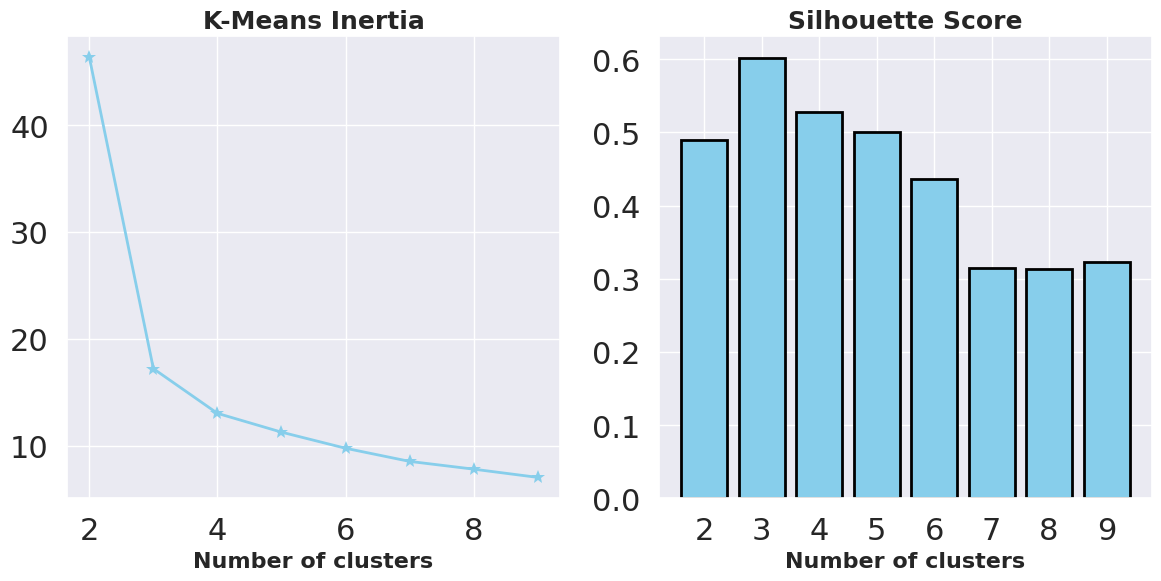

In [59]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

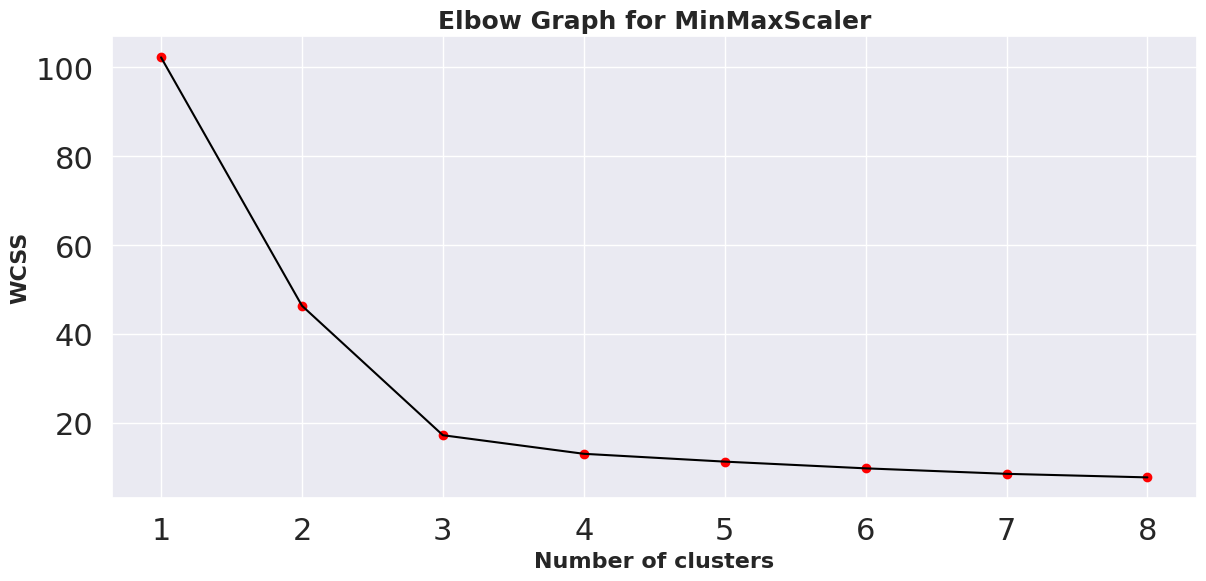

In [60]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_norm_wine)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler', fontweight='bold', fontsize=18)
plt.xlabel('Number of clusters', fontweight='bold', fontsize=16)
plt.ylabel('WCSS',fontweight='bold', fontsize=16)
plt.show()

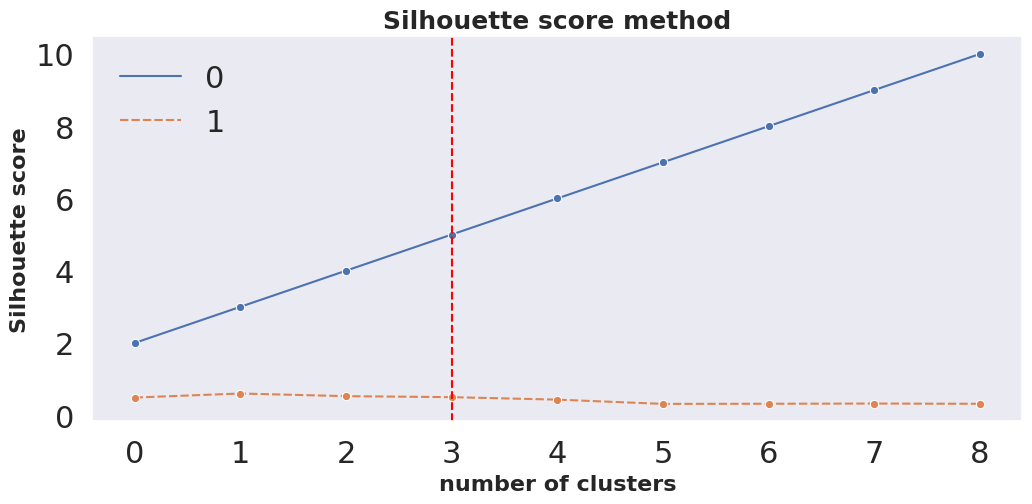

In [62]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_norm_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_norm_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=(n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method", fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


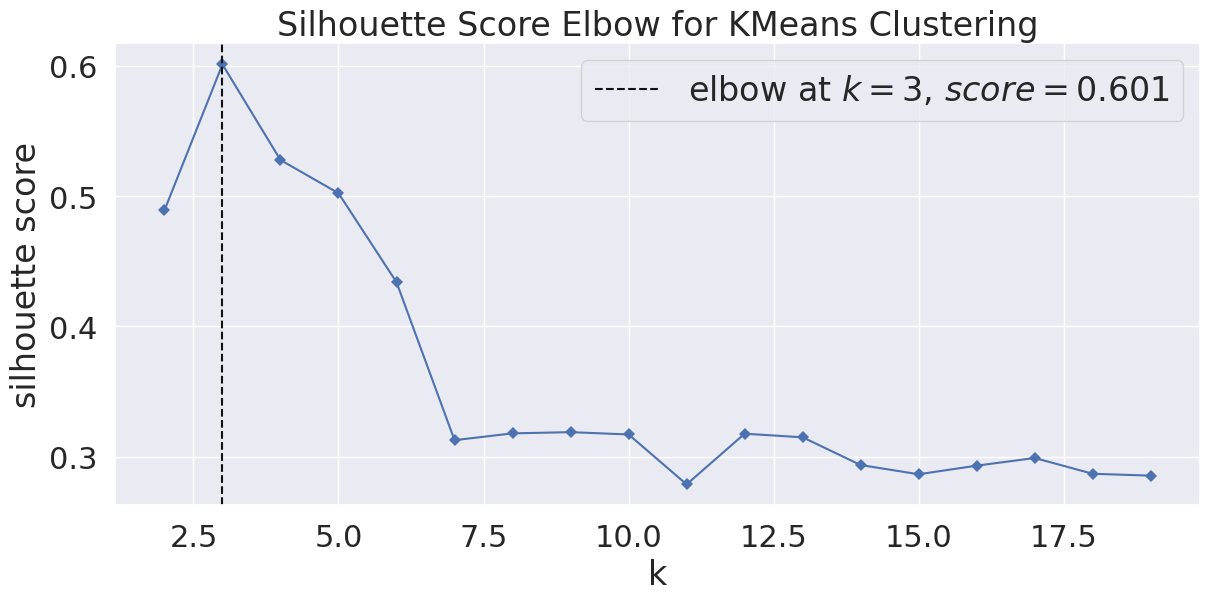

In [63]:
#Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_norm_wine)
visualizer.show()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.
We will also use the Silhouette score to determine an optimal number.

In [64]:
clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_norm_wine)
    sil_score1= sil(pca_norm_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4890723054163616
For n_clusters = 3 The average silhouette_score is : 0.6012146697343209
For n_clusters = 4 The average silhouette_score is : 0.5277801183188688
For n_clusters = 5 The average silhouette_score is : 0.5046629752487323
For n_clusters = 6 The average silhouette_score is : 0.43490375416261484
For n_clusters = 7 The average silhouette_score is : 0.31154793684682947
For n_clusters = 8 The average silhouette_score is : 0.2981623396107917
For n_clusters = 9 The average silhouette_score is : 0.32016130708396434


According the the silhouette score of:

The PCA on MinMax Scaler Applied data, the ideal number of clusters is 3, with a score higher than other options, of 0.60, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no overlapping in cluster segregation than the consecutive rest

If we check silhouette score with PCA on Normalize data kmeans model 0.60>0.51 than of PCA on Standard Scaler Dataset.

Best score always close to +1

In [65]:
#4.5 Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset
#We have found good number of cluster = 3
#Model building using cluster numbers = 3


model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_norm_wine)
y_predict_kmeans.shape

(178,)

In [66]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [67]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [68]:
model_kmeans.cluster_centers_

array([[ 0.88138874, -0.24778301,  0.00788805],
       [ 0.04006814,  0.34414911,  0.01143536],
       [-0.75185715, -0.20328088, -0.0196517 ]])

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [69]:
model_kmeans.inertia_

17.20139791740442

In [70]:
#Assign clusters to the data set

wine_df['Kmeans_Label'] = model_kmeans.labels_

In [71]:
#Group data by Clusters (K=3)


wine_df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,3.000000,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
1,2.000000,12.268571,1.936429,2.239714,20.098571,93.914286,2.244000,2.069286,0.365857,1.625571,3.082857,1.052657,2.775143,512.857143
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


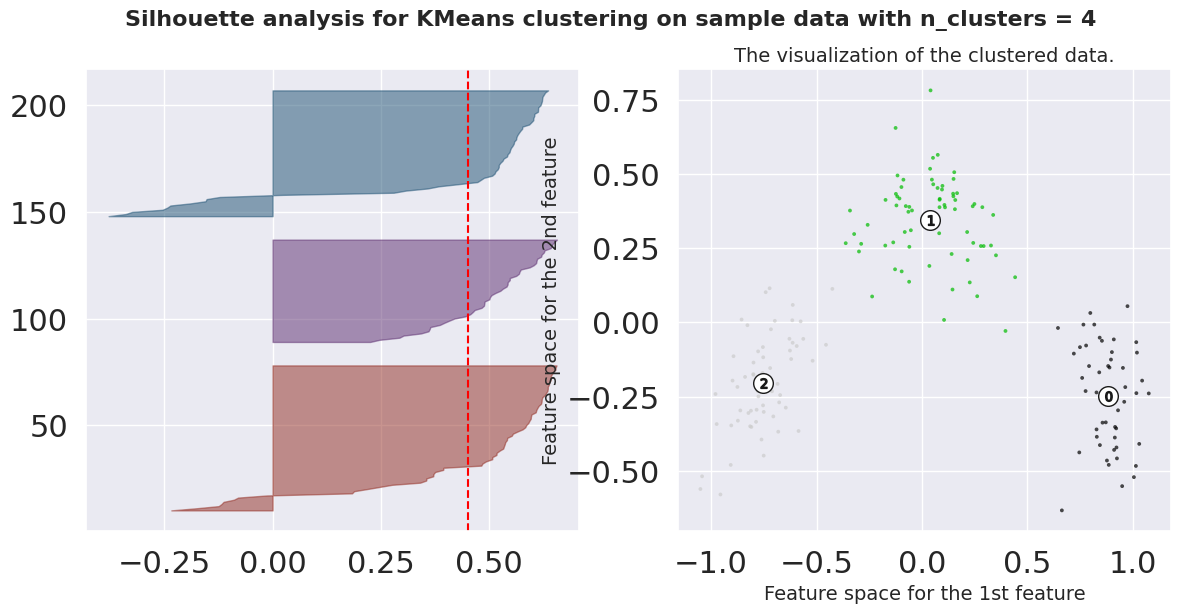

In [72]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_norm_wine.iloc[:, 0],pca_norm_wine.iloc[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()

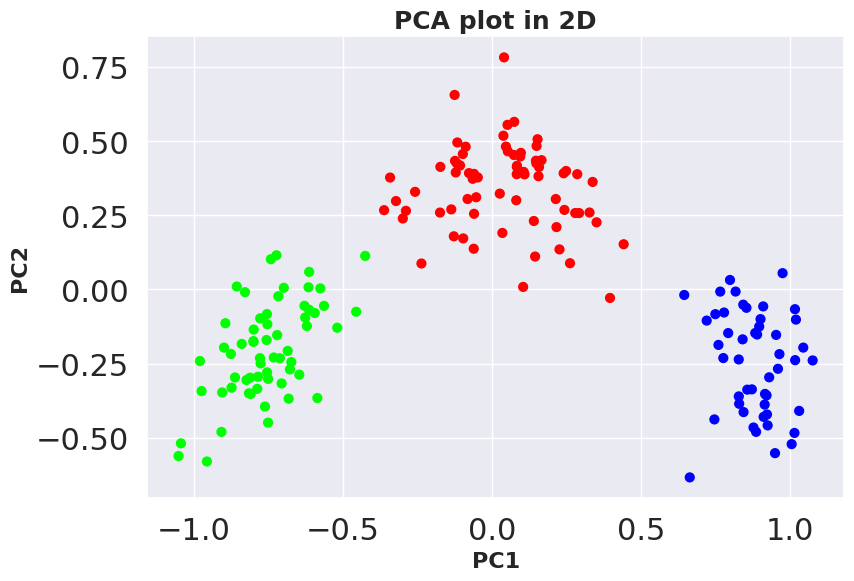

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

can now clearly see the 3 number of clusters formed

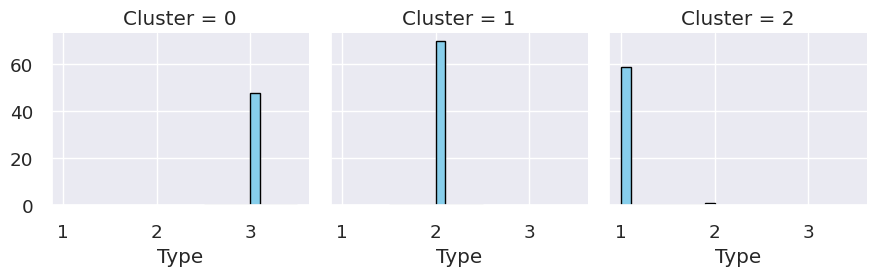

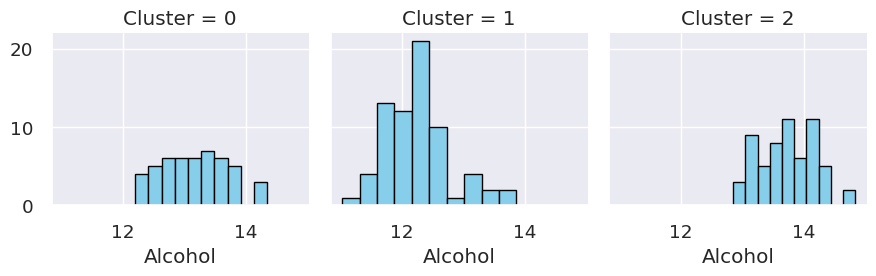

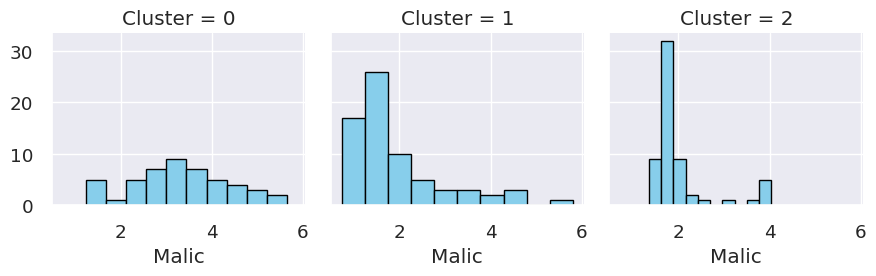

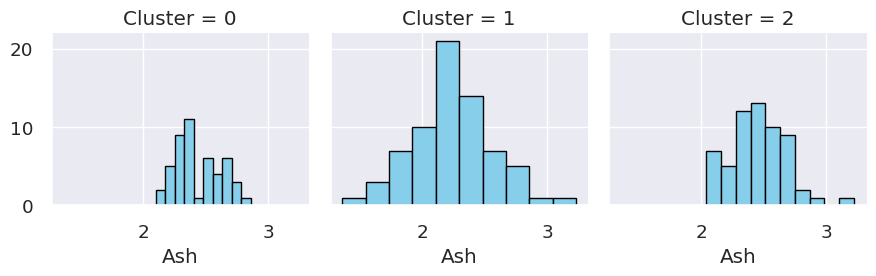

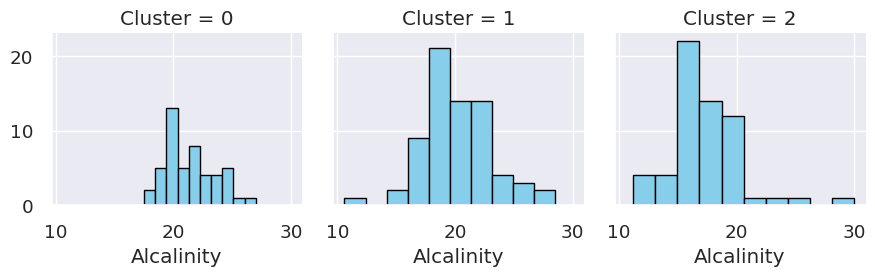

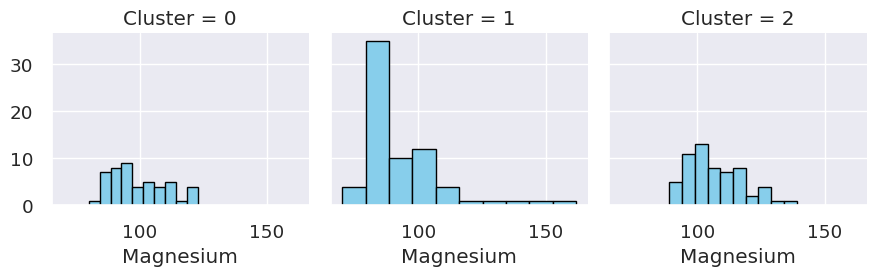

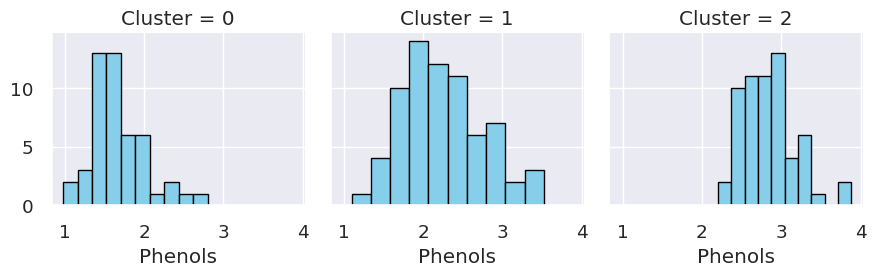

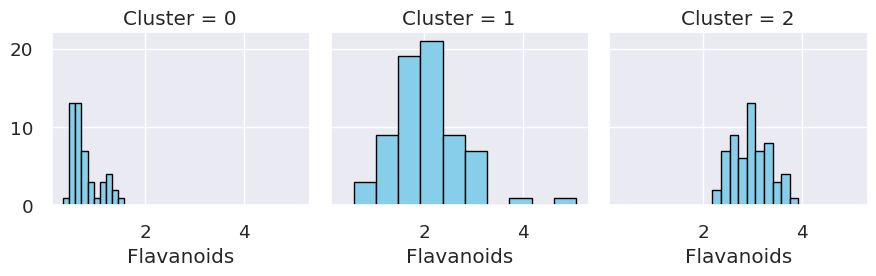

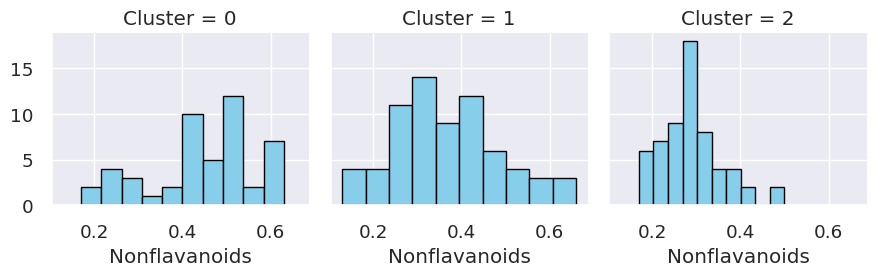

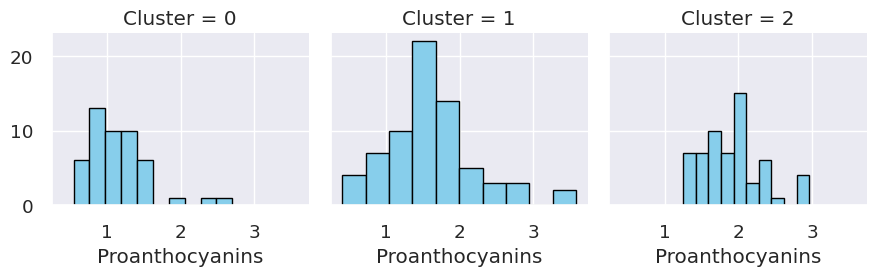

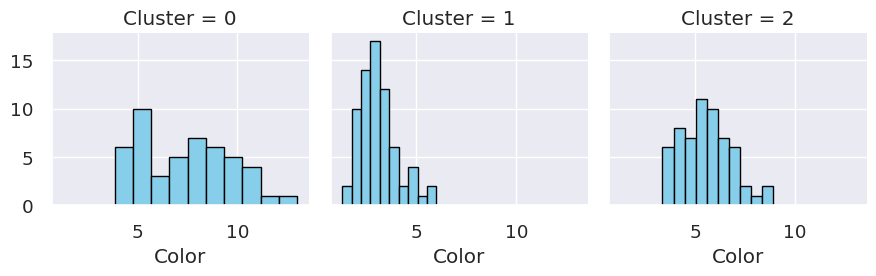

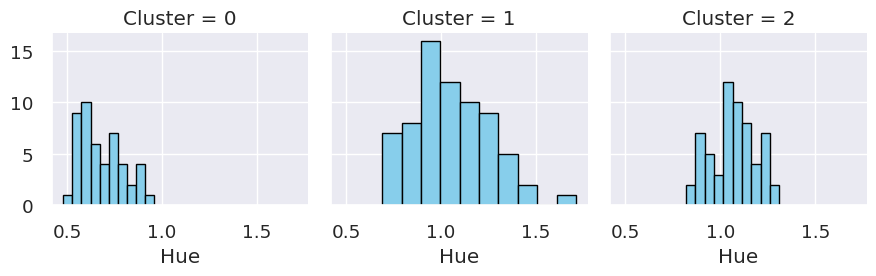

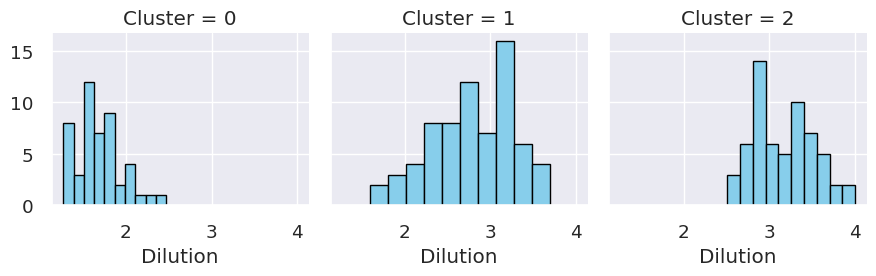

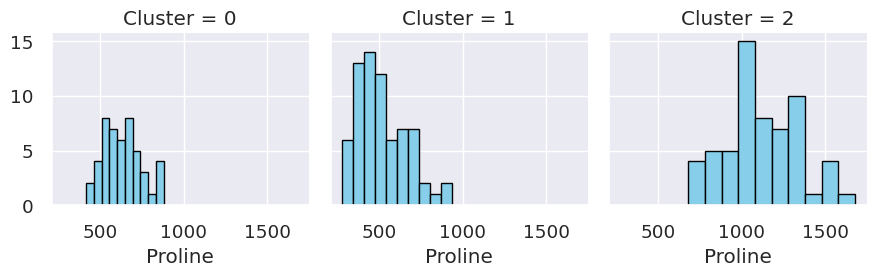

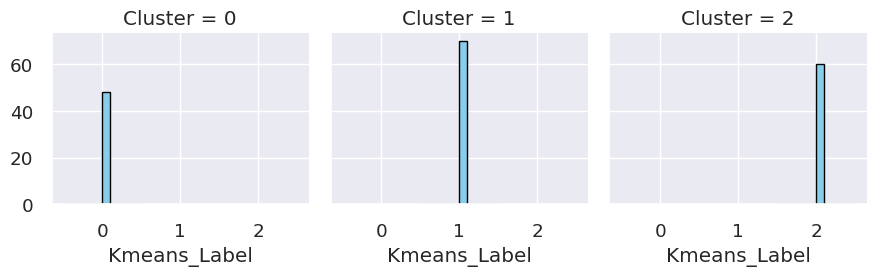

In [74]:
wine_df1 = wine_df.copy()
wine_df1['Cluster'] = model_kmeans.labels_

aux = wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [75]:
#Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,3.000000,2.000000,1.016667
Alcohol,13.153750,12.268571,13.732167
Malic,3.333750,1.936429,2.005000
Ash,2.437083,2.239714,2.458000
Alcalinity,21.416667,20.098571,17.253333
Magnesium,99.312500,93.914286,106.883333
Phenols,1.678750,2.244000,2.847833
Flavanoids,0.781458,2.069286,2.980833
Nonflavanoids,0.447500,0.365857,0.288667
Proanthocyanins,1.153542,1.625571,1.900333


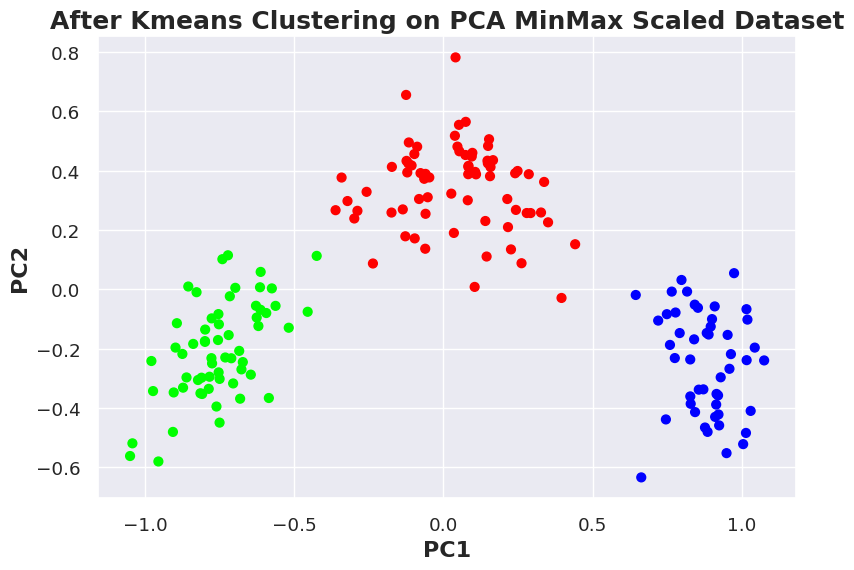

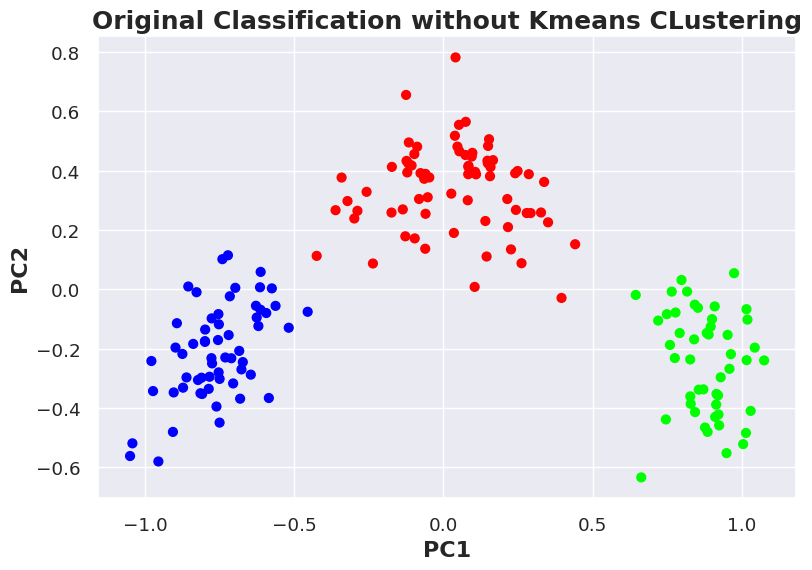

In [77]:
#4.6 .6 Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()


In [79]:
#Group data by Clusters (K=3)

display('After Applying PCA and Kmens CLustering on Dataset',wine_df.groupby('Kmeans_Label').agg(['mean']),'Original Classified Dataset',wine)

'After Applying PCA and Kmens CLustering on Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,3.000000,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
1,2.000000,12.268571,1.936429,2.239714,20.098571,93.914286,2.244000,2.069286,0.365857,1.625571,3.082857,1.052657,2.775143,512.857143
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


The Type 2 has been perfectly clustered and rest has negliglable amount of difference

We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

In [80]:
#4.7 t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(norm_wine)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE Comp. 1', 't-SNE Comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp. 1,t-SNE Comp. 2
0,-17.567860,2.176029
1,-15.192801,5.260419
2,-19.757771,6.427263
3,-20.564167,4.137458
4,-16.681688,8.178991


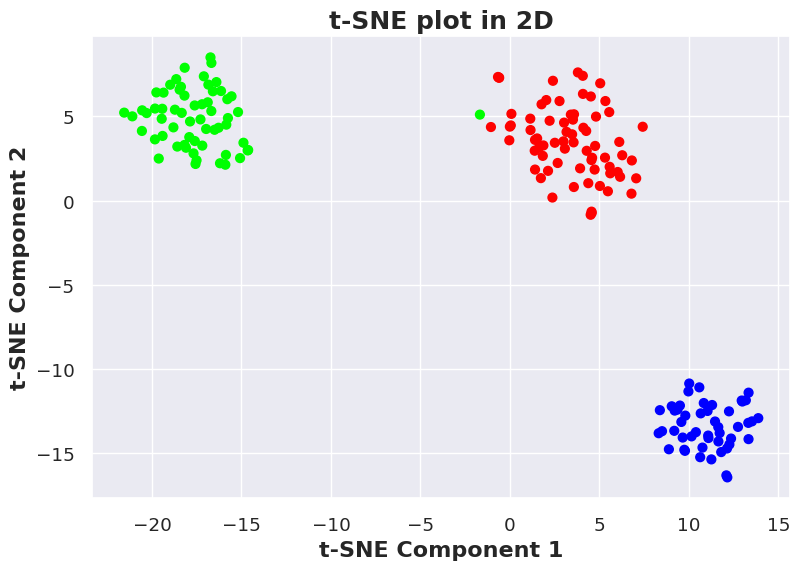

In [81]:
#t-SNE plot in 2D coloured by class
#Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()

###5)Hierarchical Clustering Algorithm


5.1 Dendogram on PCA MinMaxScaler Applied Dataset


Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

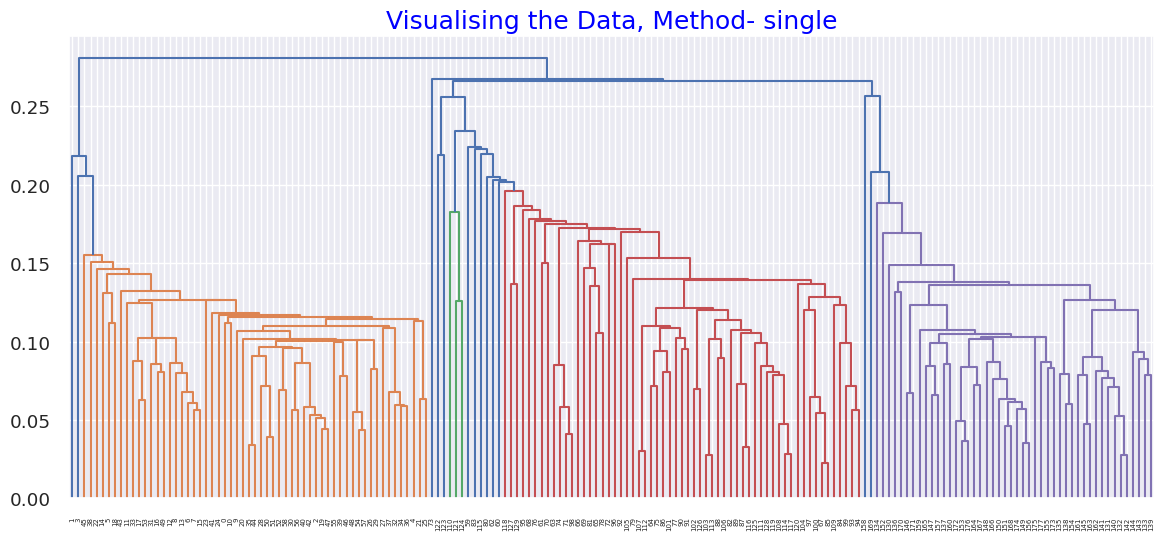

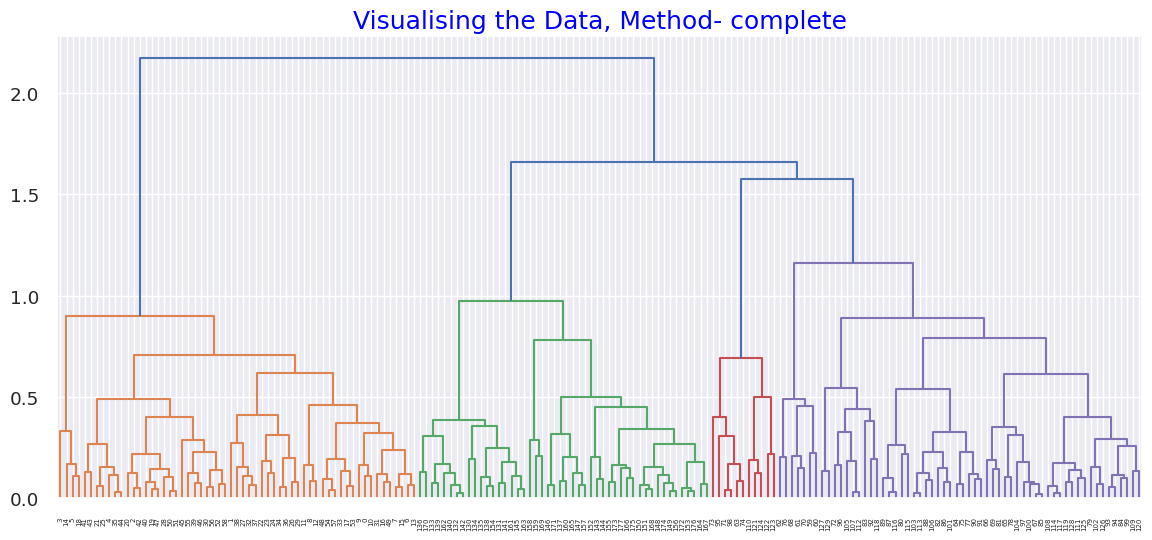

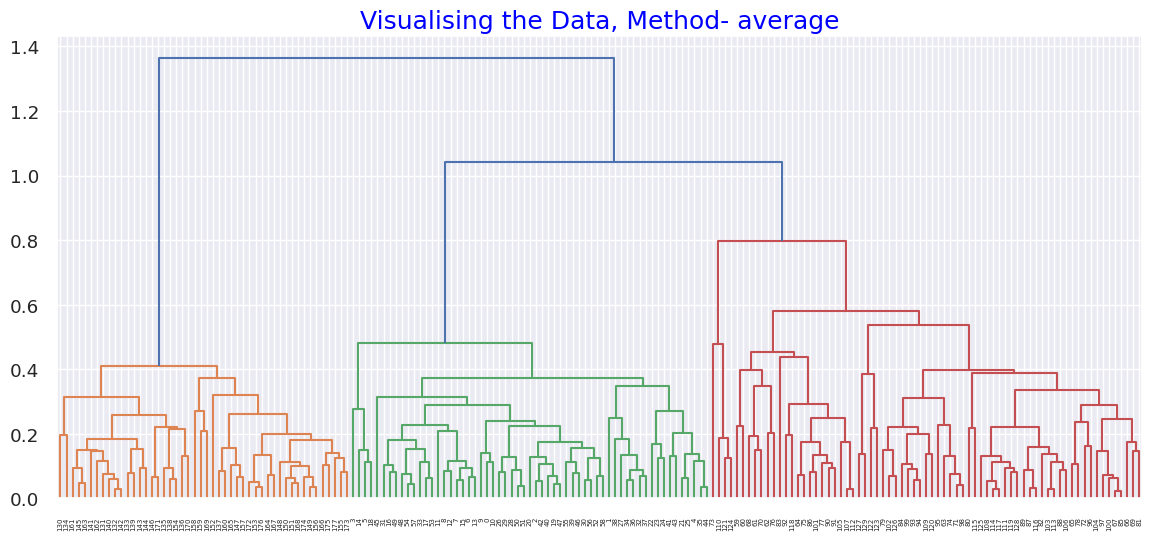

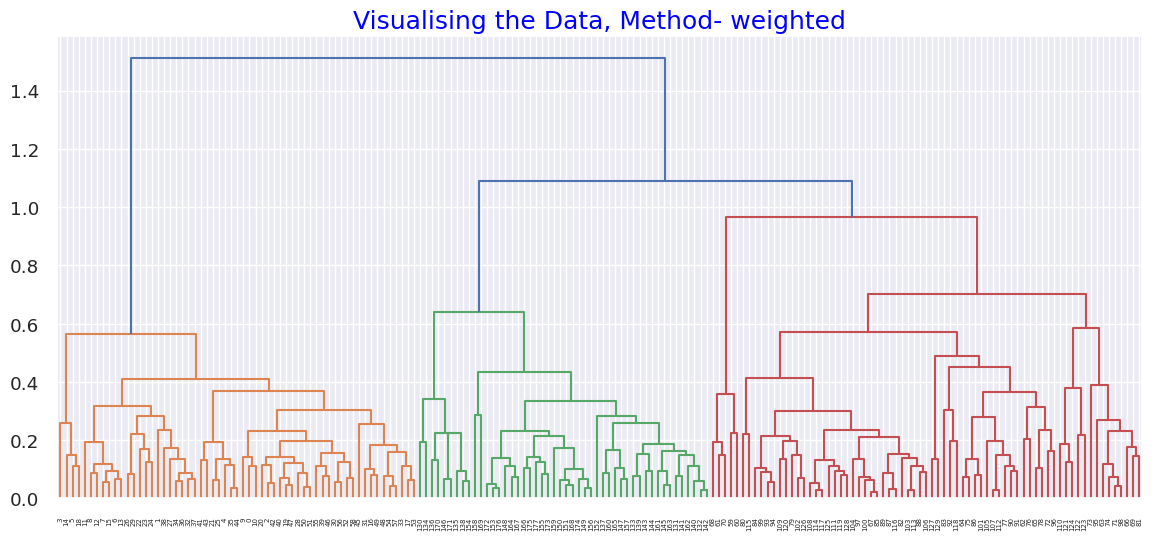

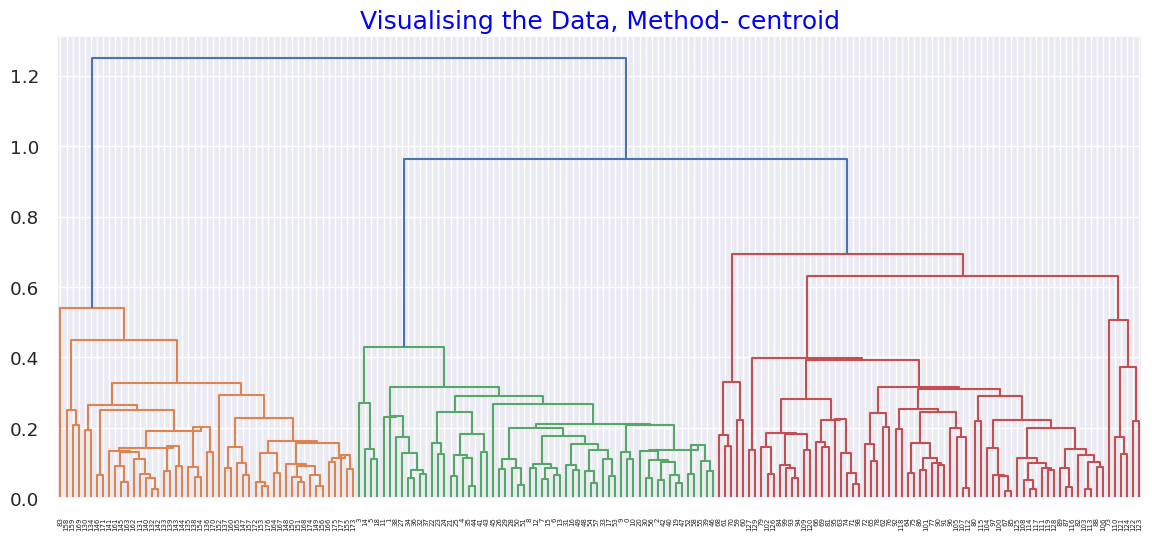

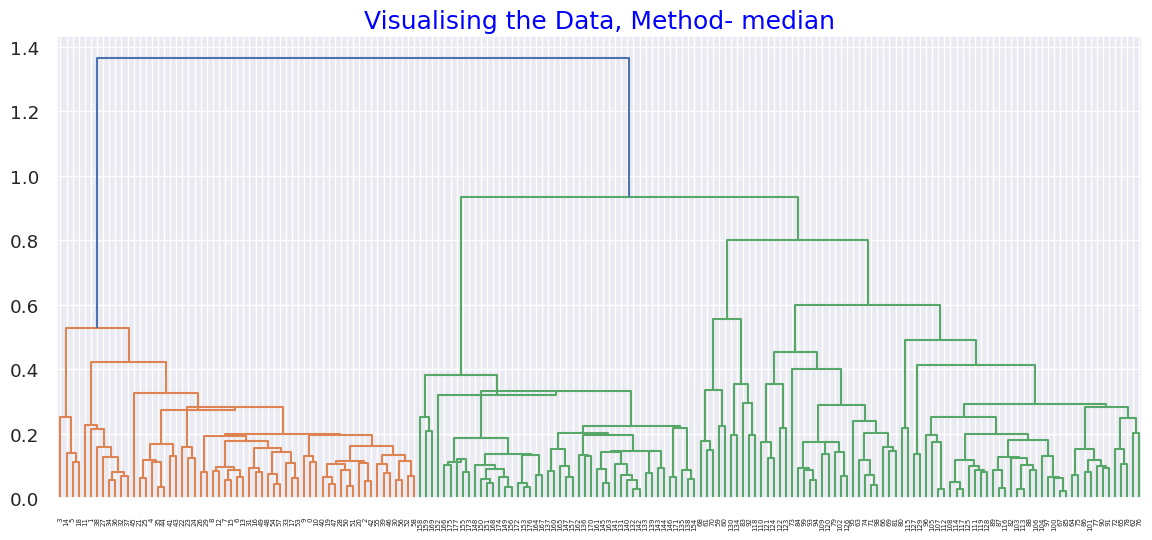

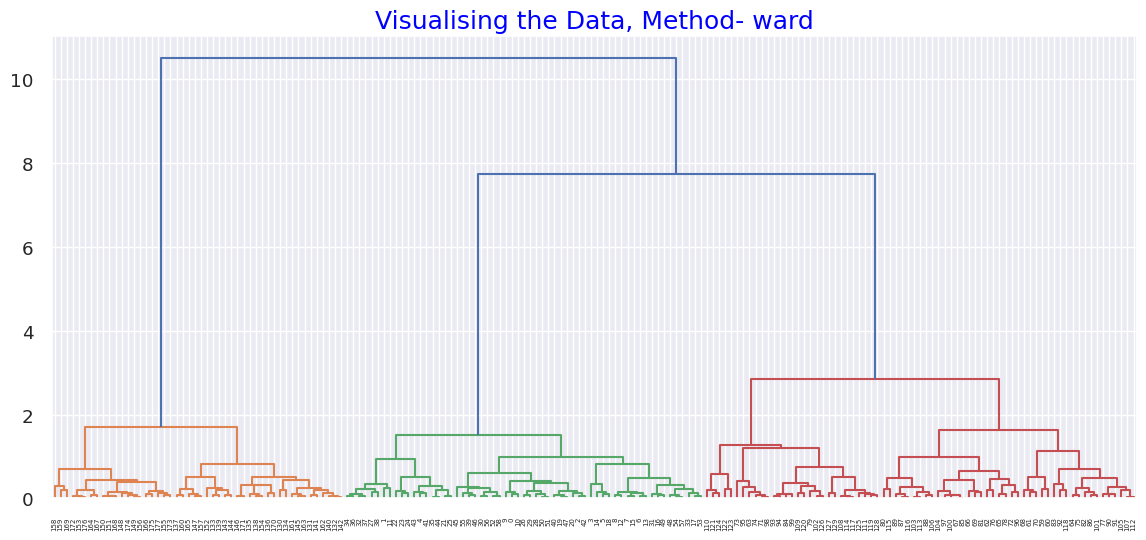

In [82]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))

    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))


5.2 Silhouette Score method for PCA MinMax Scaled Data


In [83]:
#8.2(A) Applying Different Linkages using Euclidean Method for distance Calculation


n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5155737566343557
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.49421900408730507
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5155737566343557
For n_clusters = 2 The average silhouette_score with linkage- single : 0.49421900408730507

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015492770984978
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6015492770984978
For n_clusters = 3 The average silhouette_score with linkage- average : 0.6015492770984978
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2898984716536004

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.527412020184894
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5251633534382515
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5528160807000241
For 

In [84]:
#2(B) Applying Different Linkages using Different Distance Methods

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
            silhouette_score1 = sil(pca_norm_wine, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.49421900408730507
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4957565446894258
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.49421900408730507
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4957565446894258
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.48327755332282185

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.5155737566343557
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.5157830689922072
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.5155737566343557
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.5157

The seperation in each Linkages and Distance Methods indicate that 3 is the optimal number for clusters.

For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.6015

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015

5.3 Dendrogram on Standard Scaler Applied on Data


Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

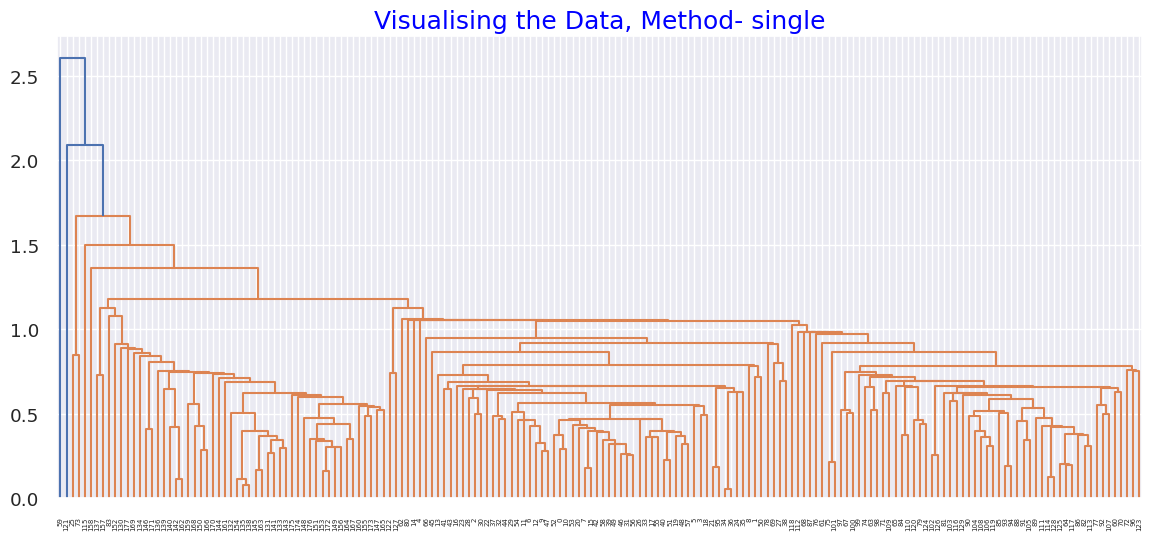

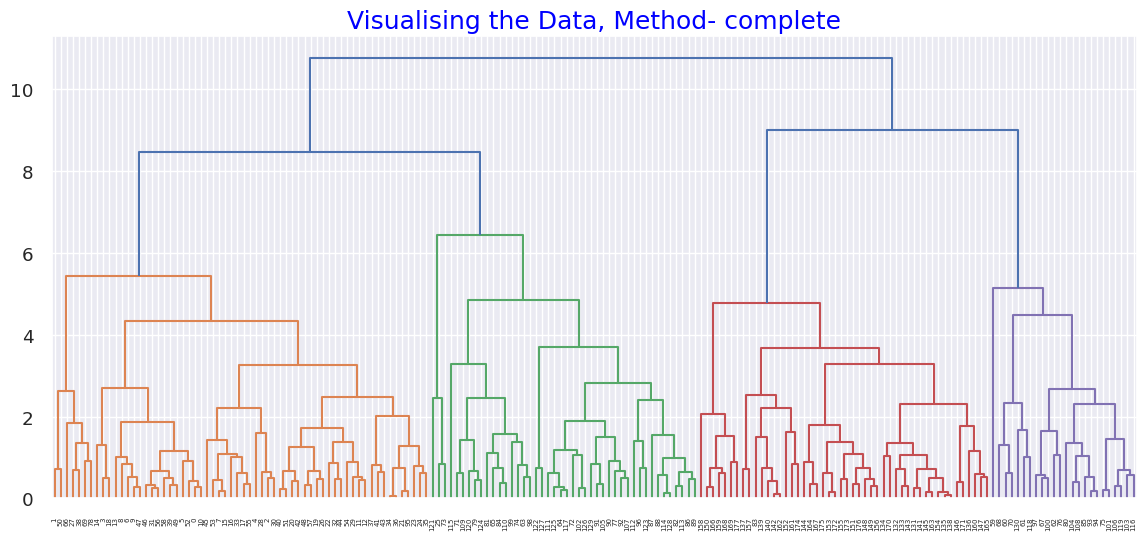

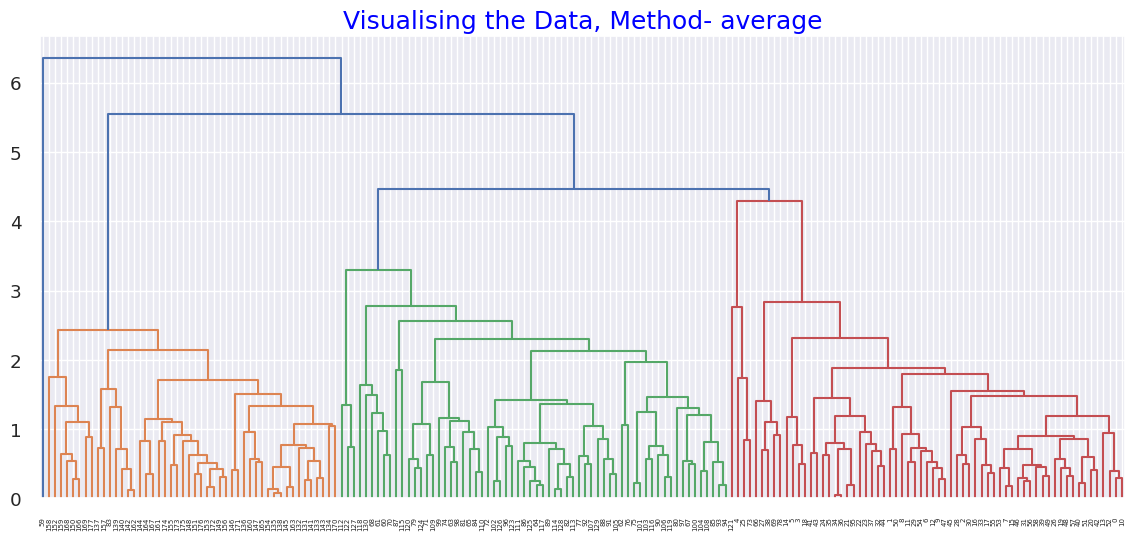

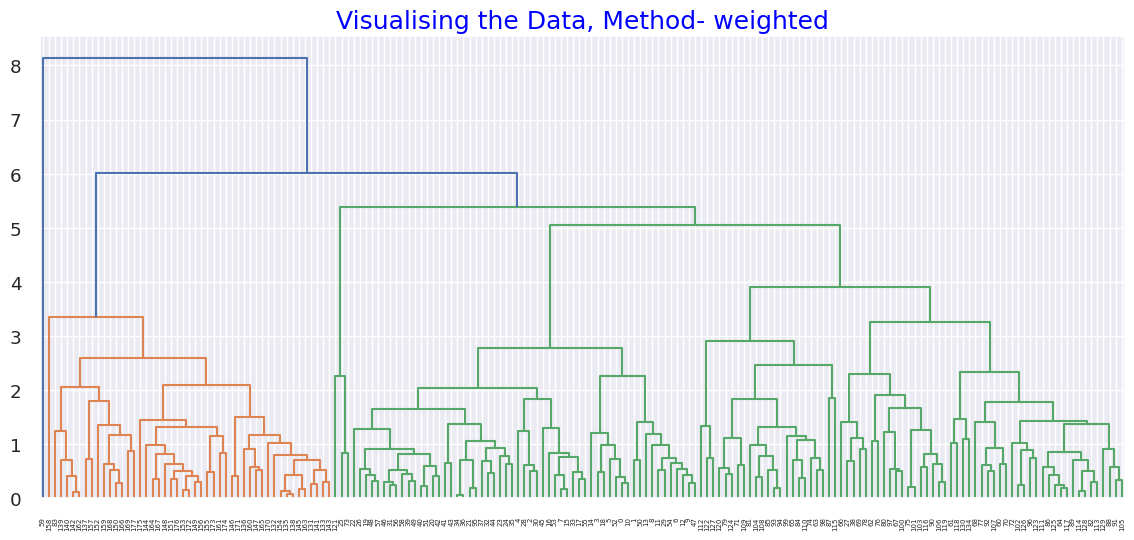

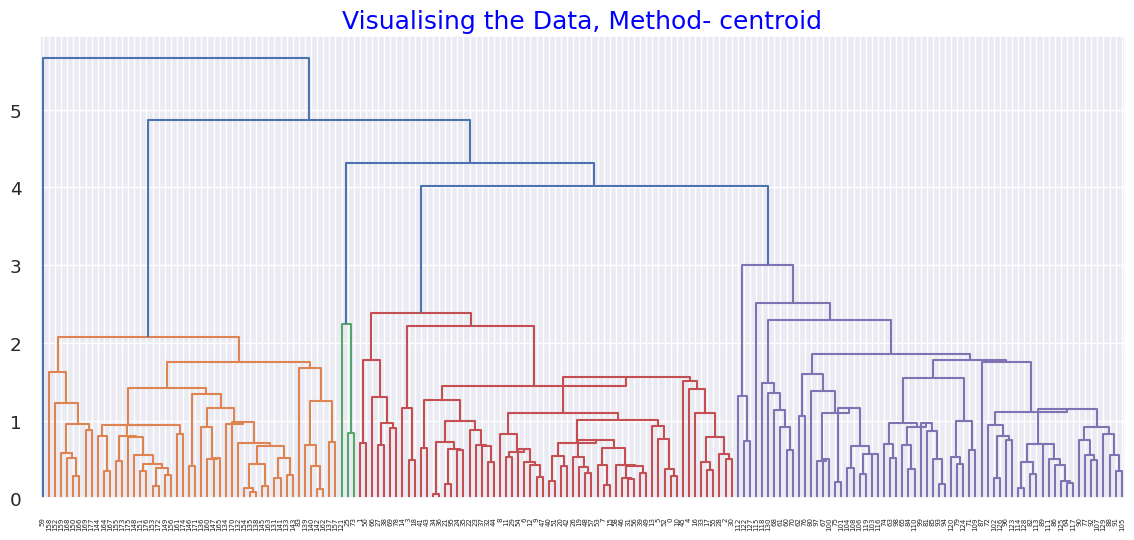

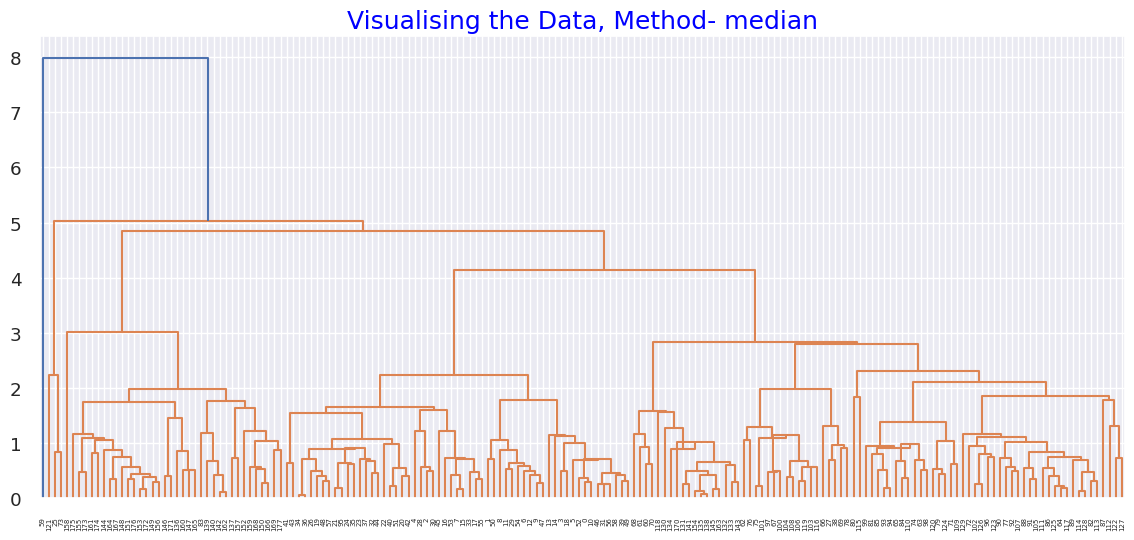

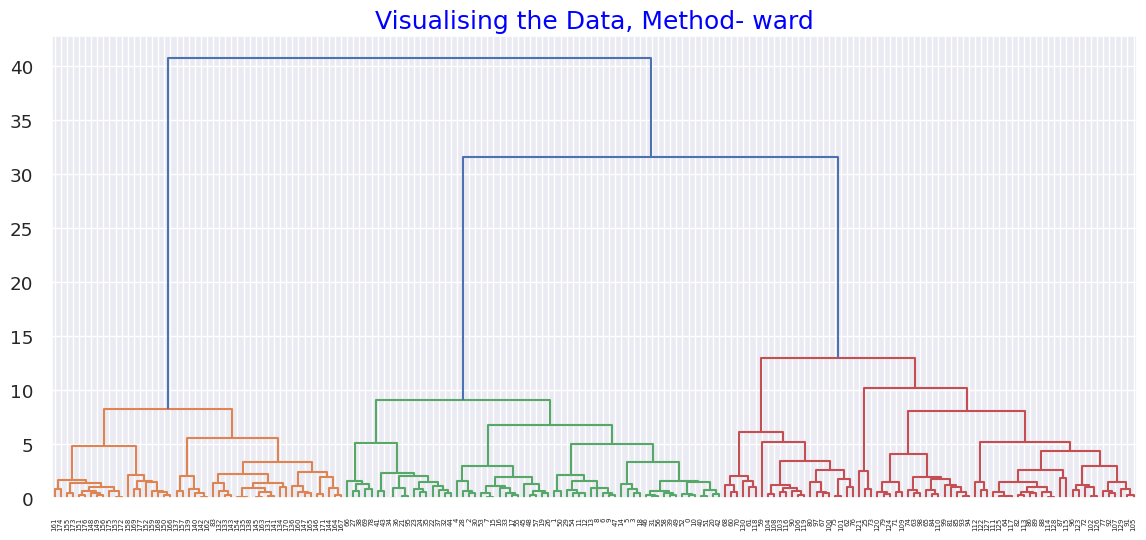

In [85]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))

    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

5.4 Silhouette Score method for PCA Standard Scaled Data

In [86]:
#5.4(A) Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4472178137923962
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3429067068238455
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3294922756457698
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3294922756457698

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006444501191468
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3018182449367176
For n_clusters = 3 The average silhouette_score with linkage- average : 0.42185702229604777
For n_clusters = 3 The average silhouette_score with linkage- single : 0.23707739937331157

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4371707740940233
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4334966057914045
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4939030134421533
For

In [87]:
#5.4(B) Applying Different Linkages using Different Distance Methods
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels2 = hie_cluster2.fit_predict(pca_std_wine)
            silhouette_score2 = sil(pca_std_wine, hie_labels2)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score2)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3429067068238455
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.23682517254779403
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3429067068238455
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.23682517254779403
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4504312105328892

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3294922756457698
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3294922756457698
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3294922756457698
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.32949

Max score is with cluster numbers 4 in standard scaler transformation transformation.
For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.0739

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

In [88]:
#5.5 Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [89]:
agg_clustering.n_clusters_

4

In [90]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)

50.469

In [91]:
#Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [92]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,0.985294
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.966667
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.666667


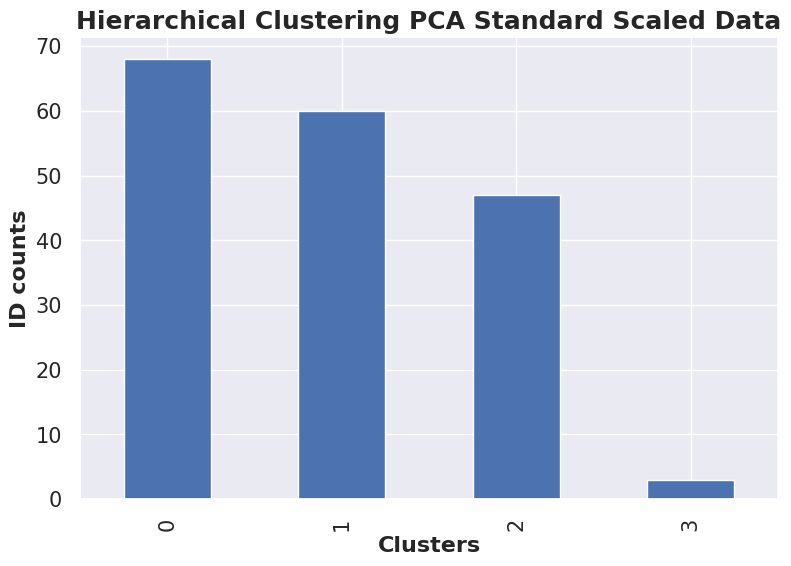

In [93]:
#Plotting barplot using groupby method to get visualize how many row no. in each cluster
fig, ax = plt.subplots(figsize=(9,6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize= 18,fontweight='bold')
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

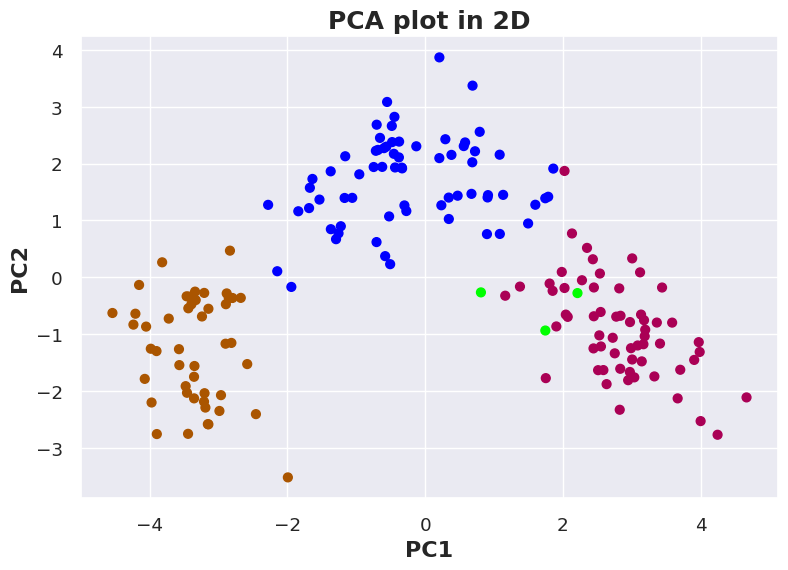

In [94]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

We cannot now clearly see the 4 number of clusters formed

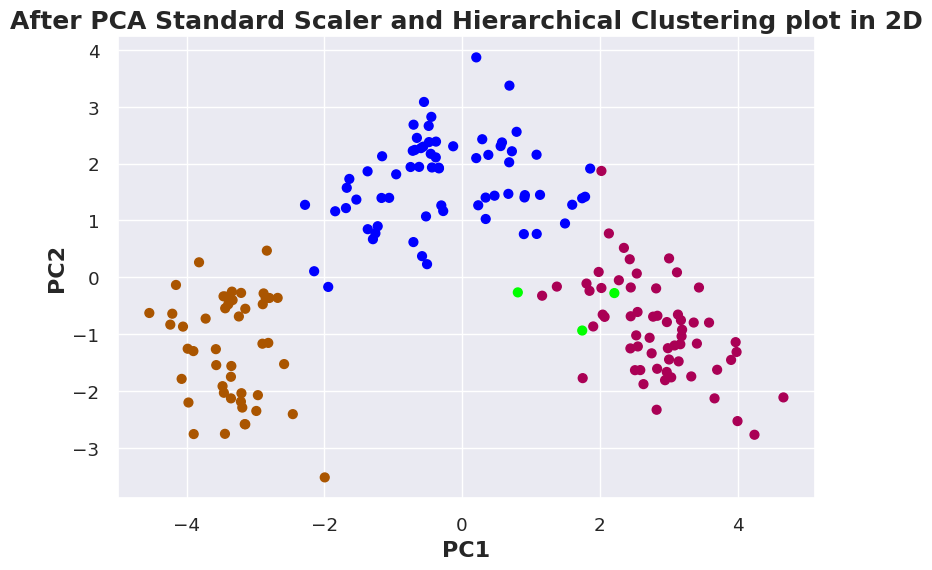

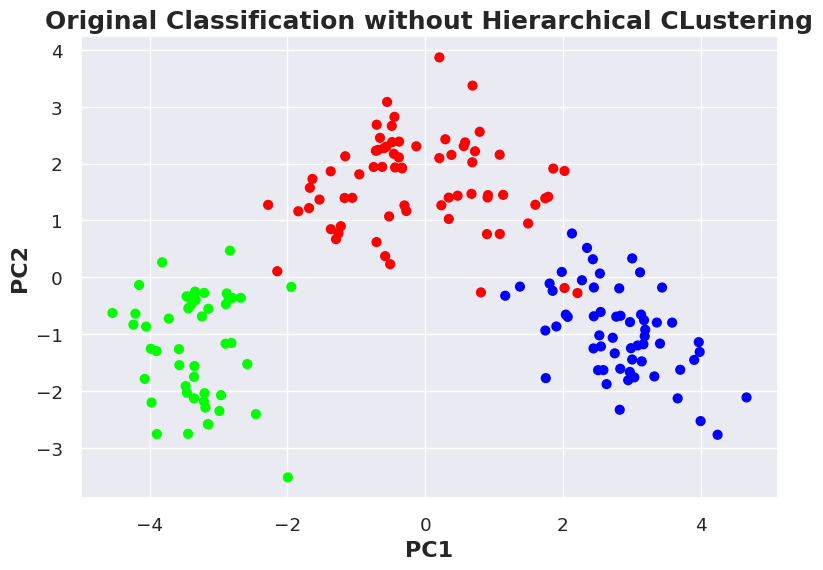

In [96]:
#8.5 Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()


In [98]:
#Group data by Clusters (Clusters=4)

display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine)

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,0.985294
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.966667
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.666667


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

In [99]:
#5.6 Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_norm_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [100]:
agg_clustering.n_clusters_

3

In [101]:
(sil(pca_norm_wine, agg_clustering.labels_)*100).round(3)

60.155

In [102]:
#Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


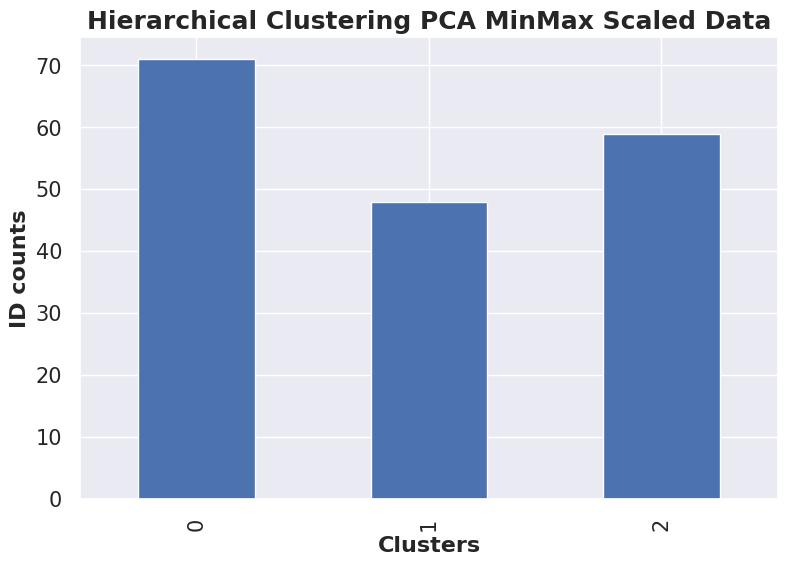

In [103]:
#Plotting barplot using groupby method to get visualize how many row no. in each cluster
fig, ax = plt.subplots(figsize=(9, 6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data', fontweight='bold', fontsize=18)
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

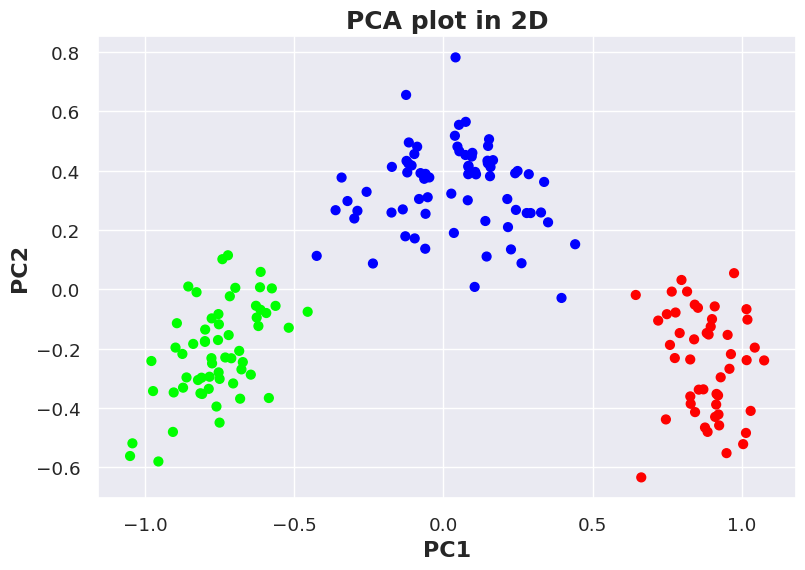

In [104]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

can now clearly see the 3 number of clusters formed

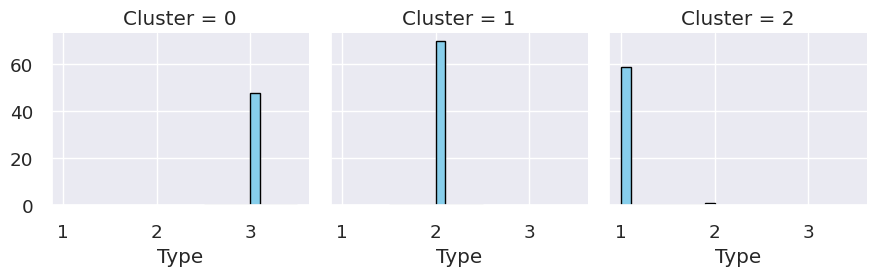

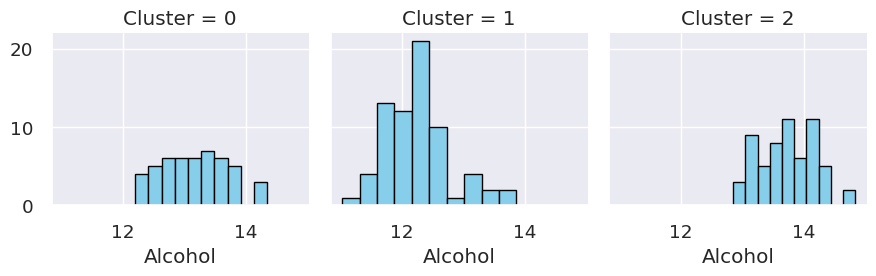

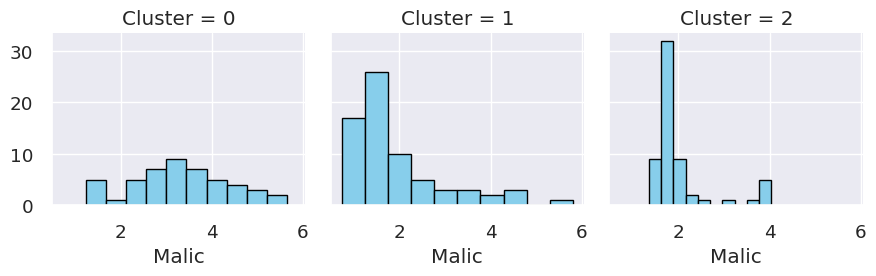

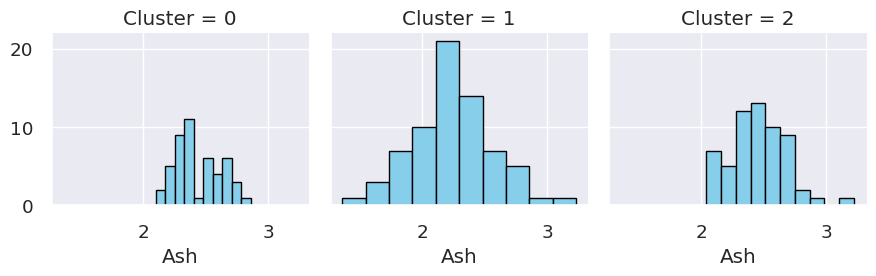

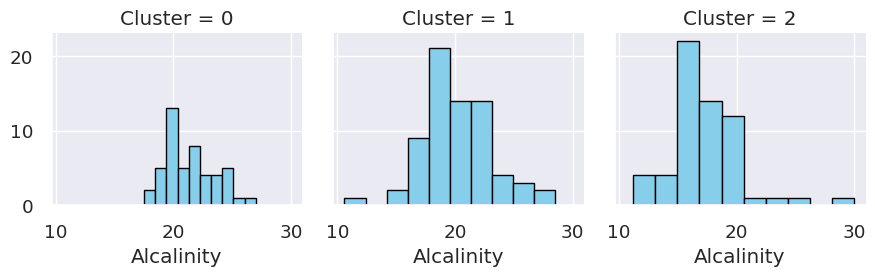

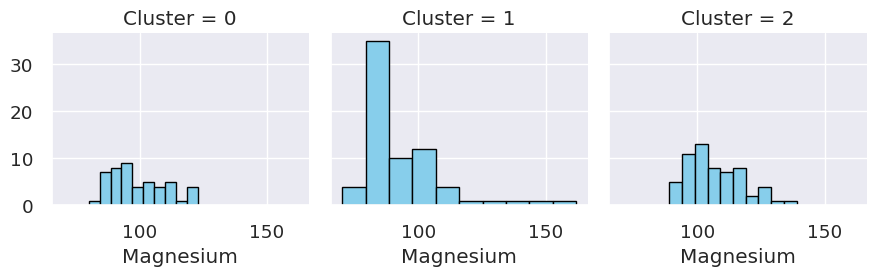

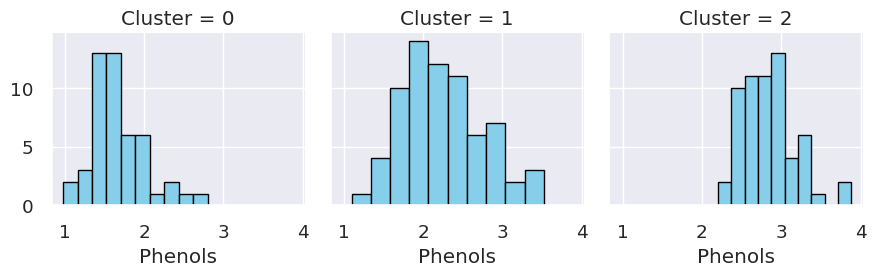

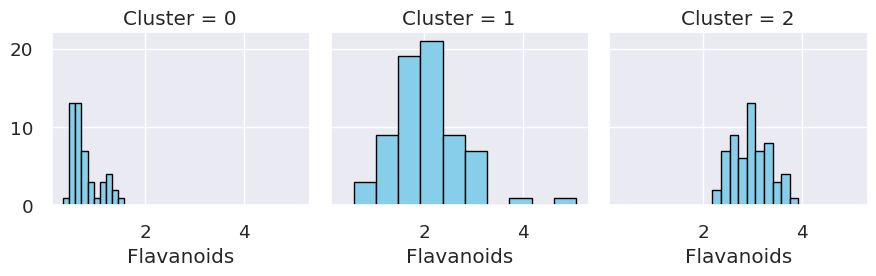

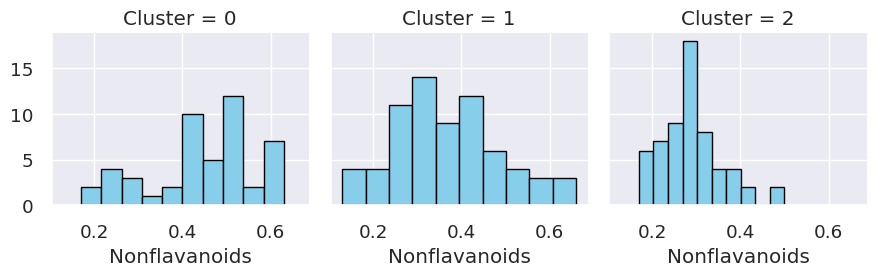

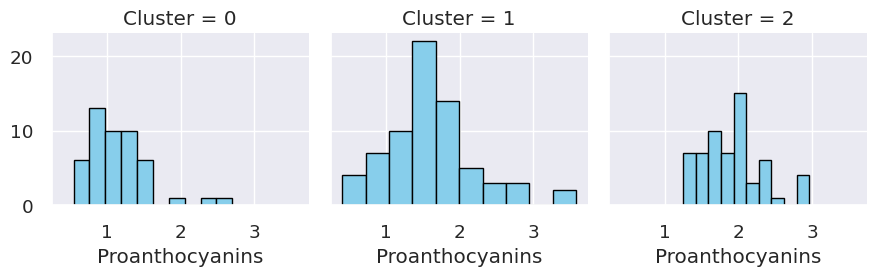

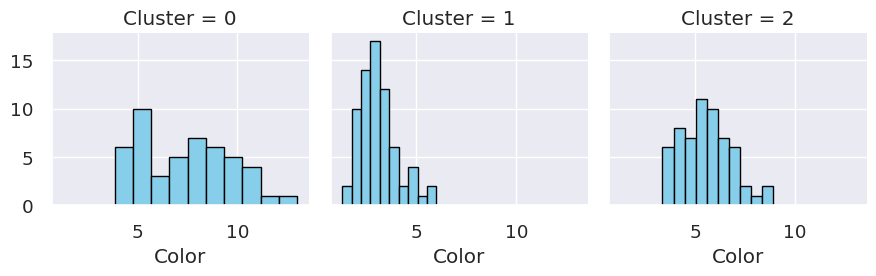

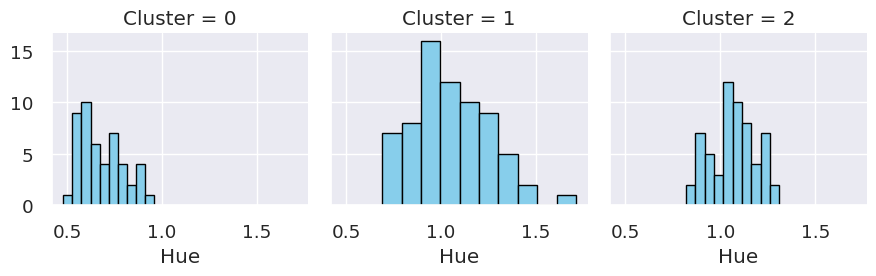

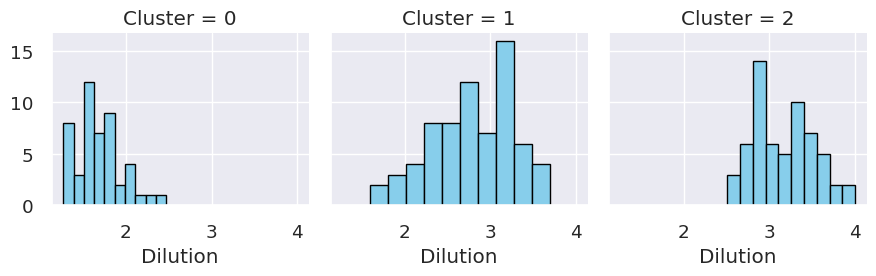

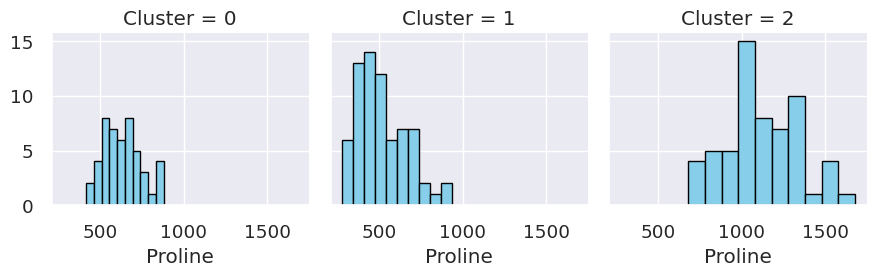

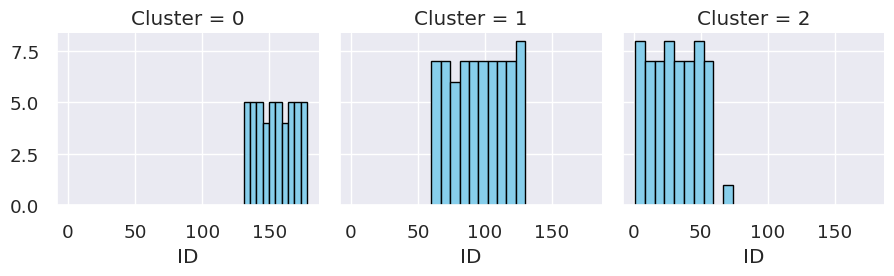

In [106]:
wine_df2 = wine.copy()
wine_df2['Cluster'] = model_kmeans.labels_

aux = wine_df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)
for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df2, col= 'Cluster')
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [107]:
#Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,3.000000,2.000000,1.016667
Alcohol,13.153750,12.268571,13.732167
Malic,3.333750,1.936429,2.005000
Ash,2.437083,2.239714,2.458000
Alcalinity,21.416667,20.098571,17.253333
Magnesium,99.312500,93.914286,106.883333
Phenols,1.678750,2.244000,2.847833
Flavanoids,0.781458,2.069286,2.980833
Nonflavanoids,0.447500,0.365857,0.288667
Proanthocyanins,1.153542,1.625571,1.900333


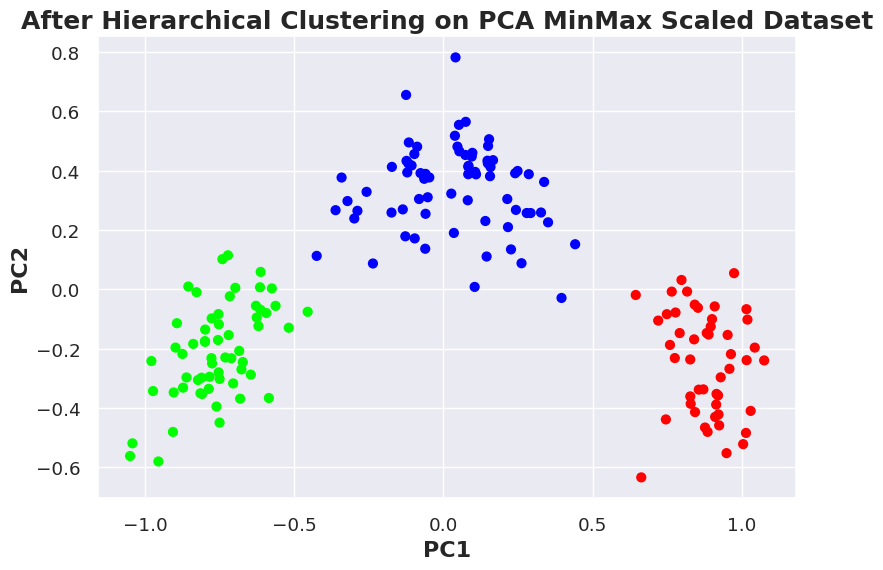

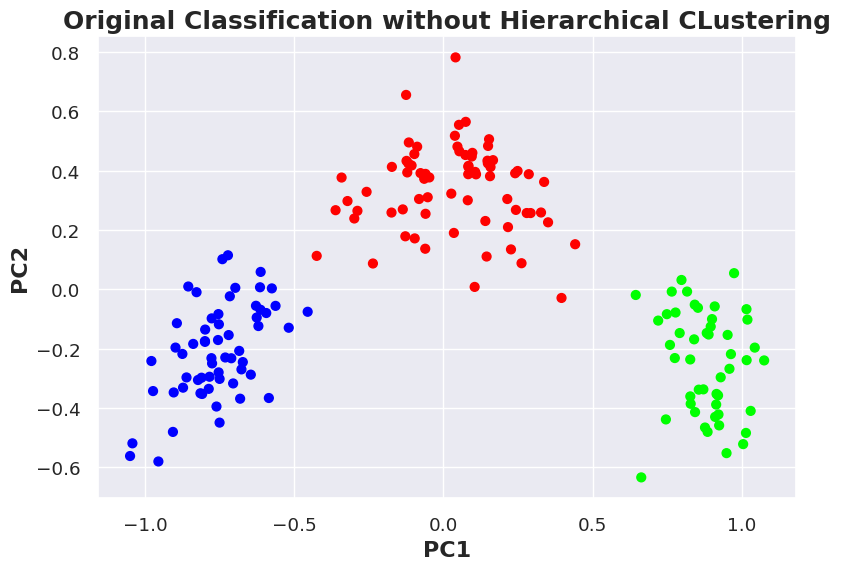

In [110]:
#5.6 Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [111]:
#Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine)

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

#overall:

#have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.

#Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

#I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig

#By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.